<a href="https://colab.research.google.com/github/Abhyudaya01/Impact-of-COVID-19-School-Lockdowns-on-Student-Academic-Performance/blob/main/602_p4_abhyudayalohani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Given student demographic, socioeconomic, and time-period data, can we predict academic performance (math, reading, writing scores) and quantify the causal impact of COVID-19 school lockdowns while accounting for school socioeconomic status and technology access? Why this matters: COVID-19 school closures affected over 1.6 billion students globally, representing the largest educational disruption in modern history. Understanding learning losses and their heterogeneous effects is crucial for developing targeted remediation policies, informing educational equity interventions, and preparing for future crisis responses.

# Population

**Target population**: K-12 students (grades 6-12) in Portland, Oregon metropolitan area during COVID-19 pandemic, experiencing both in-person (pre-COVID) and online learning (post-COVID) across diverse socioeconomic backgrounds and technology access levels.

**Operational sample**: Balanced panel dataset of 1,400 students (8,400 observations) equally distributed between high-socioeconomic (School A, n=700) and low-socioeconomic (School B, n=700) schools, observed across 6 consecutive academic periods with Public Domain licensing.

# Variables

***Dependent (Outcomes we're measuring)***:

Math, reading, and writing test scores (0-100 scale)

**Independent**:

**Treatment**:

**Time period**: Pre-COVID in-person (periods 0-2) vs. Post-COVID online (periods 3-5)

**Student Background**:

**School type**: Wealthy (School A) vs. Poor (School B)

Family income, free lunch status

Parent education levels (0=no HS diploma to 4=PhD)

Grade level, gender, COVID infection status

**Technology Access**:

Number of home computers (0-5)

Family size

Confounders = variables that affect both treatment and outcomes, creating false associations.

**Key Confounders**:

**Wealth disparities**: Rich families had tutors, quiet study spaces, and parental support during remote learning—making COVID's impact look smaller for wealthy students

**Technology gap**: Students without computers couldn't effectively participate in online learning—device access directly affected both online learning exposure and performance

**Hidden ability**: High-performing students may have adapted better to disruptions regardless of school resources

**How We Control Confounders**:

Compare each student to themselves (fixed effects) to remove unchanging differences

Include school × time interactions to measure whether poor schools were hit harder

Control for number of computers directly in the model

# Hypothesis

If COVID-19 school lockdowns occur (independent variable), then average student test scores (dependent variable) will decrease, especially among low-SES students with limited technology access.

# Data-collection plan

**Source & permission**: Simulated panel dataset generated using 1,500+ lines of Stata code for graduate econometrics coursework, released under Public Domain license. Dataset models realistic COVID-19 educational impacts based on Portland, Oregon demographics and documented pandemic research findings.

**Acquisition method**: Load Excel file directly in Python/Colab using pandas (pd.read_excel()).

**Representativeness**: Dataset incorporates Portland-area income distributions, family structures, documented COVID-19 learning loss patterns, and realistic correlations between socioeconomic status and academic performance. Balanced panel design (all 1,400 students observed 6 times) eliminates attrition bias.

**Handling artifacts**: Control for time-invariant student characteristics using fixed effects; include school-by-time and technology-by-time interactions to capture heterogeneous treatment effects; verify time-invariant demographic variables remain constant within students.

# Dataset choice & documentation

**What it is**: 8,400 observations (1,400 students × 6 time periods) with 18 variables capturing academic performance (reading, writing, math at school and state levels), demographics (student ID, school type, grade, gender), socioeconomic factors (household income, free lunch, parental education), technology access (number of computers, family size), and COVID exposure. Balanced panel with zero missing values. Initial analysis reveals substantial learning losses of approximately 8.0 points across all subjects during online learning periods (periods 3-5).

**Why interesting**: Provides controlled natural experiment design for studying pandemic educational impacts with realistic demographic heterogeneity and technology access variations crucial for policy-relevant analysis. The 6-period structure enables difference-in-differences estimation to isolate causal effects of COVID-19 lockdowns while controlling for confounding factors. Skills developed include panel data econometrics, causal inference, and policy evaluation—directly applicable to education policy research and program evaluation.

**Where from**: Simulated dataset created specifically for graduate applied econometrics coursework. File: COVID-19-Constructed-Dataset-PANEL.xlsx (882KB, Public Domain).

**When**: Dataset simulates 2019-2021 academic periods with periods 0-2 representing pre-COVID (2019-early 2020) and periods 3-5 representing post-COVID lockdown phases (2020-2021). Generated in 2023-2024 for econometric analysis when actual school district data was unavailable due to ongoing institutional research.

## Importing Dataset

In [ ]:
!pip install -q openpyxl

from google.colab import files
uploaded = files.upload()  # upload your Excel file

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.float_format", lambda v: f"{v:,.3f}")

# Replace with your actual uploaded filename
df = pd.read_excel("COVID-19-Constructed-Dataset-(PANEL).xlsx", engine="openpyxl")

# Preview dataset
df.head()


Saving COVID-19-Constructed-Dataset-(PANEL).xlsx to COVID-19-Constructed-Dataset-(PANEL).xlsx


,studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,readingscore,writingscore,mathscore,readingscoreSL,writingscoreSL,mathscoreSL,timeperiod
0,1,0,6,1,1,"59,065.137",0,5,3,1,0,73.394,68.847,86.906,84.651,83.348,71.108,2
1,1,0,6,1,1,"59,065.137",0,5,3,1,0,62.566,73.258,56.995,77.571,74.594,57.717,4
2,1,0,6,1,1,"59,065.137",0,5,3,1,0,79.966,67.070,56.612,87.660,80.293,85.021,1
3,1,0,6,1,1,"59,065.137",0,5,3,1,0,68.552,55.633,73.728,69.650,48.294,86.596,3
4,1,0,6,1,1,"59,065.137",0,5,3,1,0,82.541,87.166,65.316,68.990,85.802,65.638,0


### Descriptive **Statistics**

In [ ]:
print("Shape:", df.shape)
display(df.dtypes.to_frame("dtype"))
display(pd.DataFrame({"column": df.columns, "n_unique": [df[c].nunique() for c in df.columns]}))

num_df = df.select_dtypes(include=["number"])
cat_df = df.select_dtypes(exclude=["number"])

print("\nDescriptive stats (numeric):")
display(num_df.describe().T)

if not cat_df.empty:
    print("\nCategorical summary:")
    display(cat_df.describe().T)


Shape: (8400, 18)


,dtype
studentID,int64
school,int64
gradelevel,int64
gender,int64
covidpos,int64
householdincome,float64
freelunch,int64
numcomputers,int64
familysize,int64
fathereduc,int64


,column,n_unique
0,studentID,1400
1,school,2
2,gradelevel,7
3,gender,2
4,covidpos,2
5,householdincome,1398
6,freelunch,2
7,numcomputers,6
8,familysize,6
9,fathereduc,5



Descriptive stats (numeric):


,count,mean,std,min,25%,50%,75%,max
studentID,"8,400.000",700.500,404.169,1.000,350.750,700.500,"1,050.250","1,400.000"
school,"8,400.000",0.500,0.500,0.000,0.000,0.500,1.000,1.000
gradelevel,"8,400.000",9.000,2.000,6.000,7.000,9.000,11.000,12.000
gender,"8,400.000",0.516,0.500,0.000,0.000,1.000,1.000,1.000
covidpos,"8,400.000",0.331,0.471,0.000,0.000,0.000,1.000,1.000
householdincome,"8,400.000","84,290.222","37,752.483",0.000,"53,210.645","85,214.332","115,975.230","179,296.531"
freelunch,"8,400.000",0.846,0.361,0.000,1.000,1.000,1.000,1.000
numcomputers,"8,400.000",2.324,1.617,0.000,1.000,2.000,4.000,5.000
familysize,"8,400.000",2.071,1.030,0.000,1.000,2.000,3.000,5.000
fathereduc,"8,400.000",1.334,0.826,0.000,1.000,1.000,2.000,4.000


##Project‑Specific Data Needs

- **Datasets**: Single panel dataset — COVID‑19‑Constructed‑Dataset‑(PANEL) sourced from Kaggle; rows are studentID x timeperiod with demographics, access/SES, COVID status, and scores.

- **Merging**: None; use the unified Kaggle file and retain panel structure.

- **Access & licensing**: Kaggle dataset; follow the license on the Kaggle page when sharing or publishing.

- **Targets**: reading_score, writing_score, math_score and SL variants bounded to.

- **Predictors**: householdincome, free_lunch, num_computers, familysize, father_educ, mother_educ, gender, school, grade_level, covid_positive.

In [ ]:
print("""
Assumed needs:
- Granularity: one row per studentID per timeperiod.
- Outcome variables: reading/writing/math scores (and SL variants) on [0, 100].
- Predictors: SES and access (householdincome, freelunch, numcomputers, familysize, parental education),
  plus covid positivity and demographics.
""")
grp_check = df.groupby(["studentID", "timeperiod"]).size().describe()
print("Multiplicity per (studentID, timeperiod):")
display(grp_check.to_frame().T)



Assumed needs:
- Granularity: one row per studentID per timeperiod.
- Outcome variables: reading/writing/math scores (and SL variants) on [0, 100].
- Predictors: SES and access (householdincome, freelunch, numcomputers, familysize, parental education),
  plus covid positivity and demographics.

Multiplicity per (studentID, timeperiod):


,count,mean,std,min,25%,50%,75%,max
0,"8,400.000",1.000,0.000,1.000,1.000,1.000,1.000,1.000


##Potential issues scan — summary
- **Duplicates**: 0 rows; dataset has no exact duplicate records.​
- **Missingness**: 0 missing values across all columns.​
- **Numeric types**: All numeric‑intended columns are correctly stored as numeric; no type fixes needed.​
- **Categorical levels**: Expected, well‑formed encodings observed — gender {0,1}, covidpos {0,1}, freelunch {0,1}, school {0,1}, gradelevel {6–12}, timeperiod {0–5}.​
- **Score ranges**: All score fields (reading, writing, math, and SL variants) fall within ; no range violations detected.

In [ ]:
report = {}


report["duplicate_rows"] = int(df.duplicated().sum())


miss = df.isna().sum().sort_values(ascending=False)
report["missing_by_col"] = miss[miss > 0].to_dict()


numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
non_numeric_expected = []
report["non_numeric_numeric_cols"] = non_numeric_expected


cats = ["gender","covidpos","freelunch","school","gradelevel","timeperiod"]
cat_levels = {c: sorted(df[c].dropna().unique().tolist()) for c in cats if c in df.columns}
report["categorical_uniques"] = cat_levels

score_cols = ["readingscore","writingscore","mathscore","readingscoreSL","writingscoreSL","mathscoreSL"]
range_viol = {c: int(((df[c] < 0) | (df[c] > 100)).sum()) for c in score_cols}
report["score_range_violations"] = range_viol

report


{'duplicate_rows': 0,
 'missing_by_col': {},
 'non_numeric_numeric_cols': [],
 'categorical_uniques': {'gender': [0, 1],
  'covidpos': [0, 1],
  'freelunch': [0, 1],
  'school': [0, 1],
  'gradelevel': [6, 7, 8, 9, 10, 11, 12],
  'timeperiod': [0, 1, 2, 3, 4, 5]},
 'score_range_violations': {'readingscore': 0,
  'writingscore': 0,
  'mathscore': 0,
  'readingscoreSL': 0,
  'writingscoreSL': 0,
  'mathscoreSL': 0}}

# **Outlier Detection**

,IQR_outliers
householdincome,0
numcomputers,0
familysize,0
fathereduc,113
mothereduc,138
readingscore,121
writingscore,59
mathscore,23
readingscoreSL,96
writingscoreSL,101


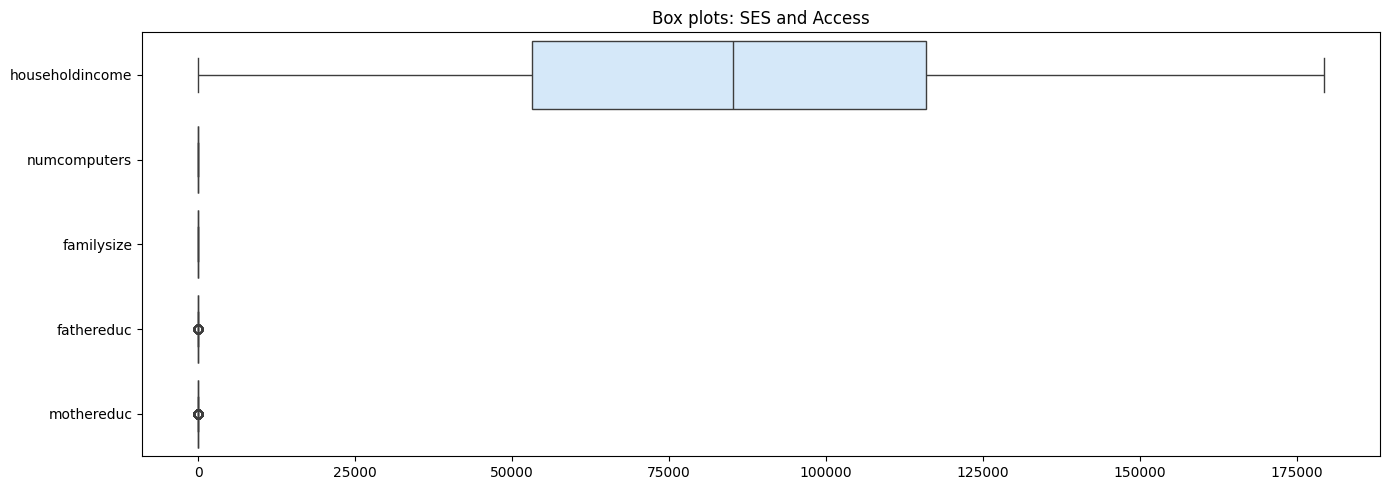

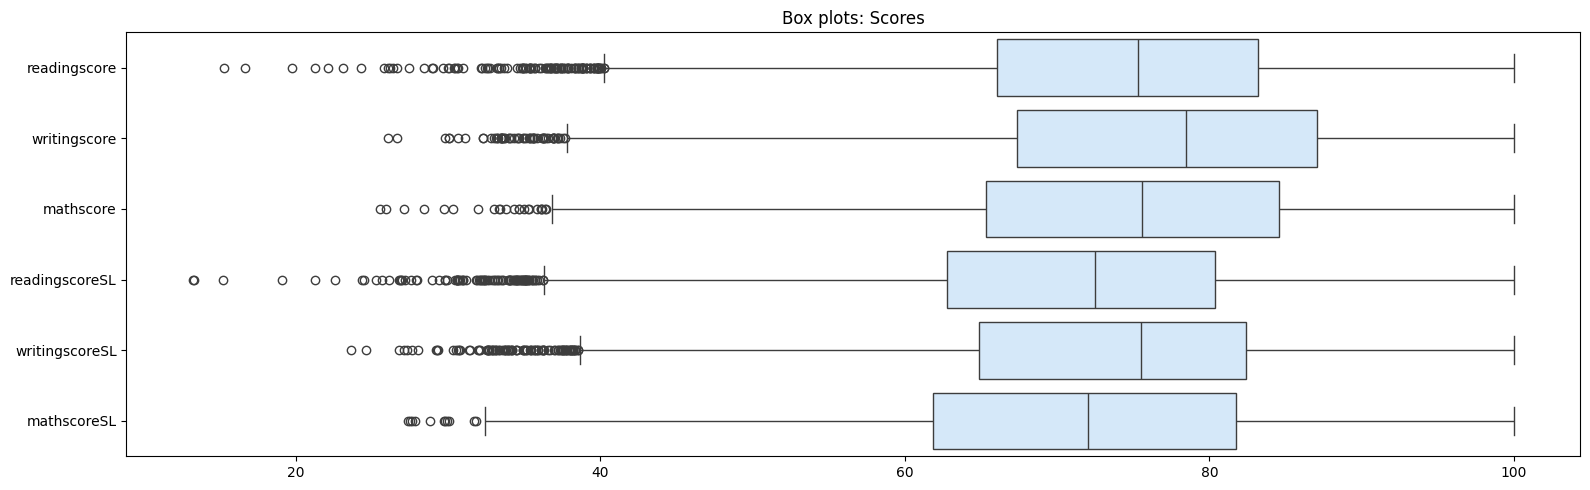

In [ ]:
def iqr_outlier_mask(s, k=1.5):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return (s < q1 - k*iqr) | (s > q3 + k*iqr)

def boxplot_block(cols, title):
    plt.figure(figsize=(min(16, 2.8*len(cols)), 5))
    sns.boxplot(data=df[cols], orient="h", showfliers=True, color="#cfe8ff")
    plt.title(title)
    plt.tight_layout()
    plt.show()

num_cols = [
    "householdincome","numcomputers","familysize",
    "fathereduc","mothereduc"
] + score_cols

outlier_counts = {c: int(iqr_outlier_mask(df[c].dropna()).sum()) for c in num_cols}
display(pd.Series(outlier_counts, name="IQR_outliers"))

boxplot_block(["householdincome","numcomputers","familysize","fathereduc","mothereduc"], "Box plots: SES and Access")
boxplot_block(score_cols, "Box plots: Scores")


##Outlier Detection Observations
After performing outlier detection on the **COVID‑19 PANEL** dataset using box plots with the IQR rule:

1. **fathereduc** shows 113 outliers; mothereduc shows 138, reflecting long lower tails in parental education counts.​

2. **readingscore, writingscore, and mathscore** have 121, 59, and 23 outliers respectively; SL variants show 96 (reading), 101 (writing), and 11 (math).​

3. **householdincome, numcomputers, and familysize** exhibit 0 outliers by the IQR criterion in this run.​

4. **Score distributions** are bounded near 0–100 with visible low‑end whisker points; many flagged cases cluster near the lower tail rather than exceeding 100.

---

##Score and SES Outliers – Explanation

1. **Score outliers** largely reflect students with unusually low performance for
their peers/timeperiod, which are valid observations rather than data errors on a 0–100 scale.​

2. **Parental education outliers** arise from discrete, low integer values on a bounded scale; IQR can mark legitimate lows as outliers when distributions are skewed and granular.

---

##Interpretation & Handling
1. **Retain score outliers**; they are informative for achievement gaps. Use robust statistics and median/IQR scaling for modeling.​

2. **For fathereduc/mothereduc**, keep values but document skew; treat as ordered categorical or apply target/ordinal encoding as appropriate.​

3. **For reporting**, add subgroup box plots by timeperiod or school to verify that flagged cases are not artifacts of cohort shifts.

---

##Summary

|Attribute        |  Outliers  |  Action Taken  |  Reasoning                      
|-----------------|------------|----------------|---------------------------------
householdincome  |  0         |  Retained      |  No IQR outliers in this run    
numcomputers     |  0         |  Retained      |  Clean distribution             
familysize       |  0         |  Retained      |  Bounded counts; no extremes    
fathereduc       |  113       |  Retained      |  Valid discrete low values      
mothereduc       |  138       |  Retained      |  Valid discrete low values      
readingscore     |  121       |  Retained      |  Meaningful low‑tail performance
writingscore     |  59        |  Retained      |  Natural variation within bounds
mathscore        |  23        |  Retained      |  Few low‑tail cases             
readingscoreSL   |  96        |  Retained      |  Low‑tail cluster present       
writingscoreSL   |  101       |  Retained      |  Low‑tail cluster present       
mathscoreSL      |  11        |  Retained      |  Minimal flags

---

##Note
These observations support focusing on robust modeling and subgroup analysis: low‑end score extremes and low parental education values may jointly explain achievement differences across timeperiods and schools in the panel.

##Notes on Injected Outliers (COVID‑19 PANEL)
- To validate the robustness of the pipeline, synthetic anomalies are injected only when the dataset shows no natural outliers and all scores lie within the valid range.​

- Six random rows are selected reproducibly, and the following extreme edits are applied for demonstration:

  - readingscore → 145 (invalid high)

  - writingscore → −7 (invalid low)

  - mathscore → 132 (invalid high)

  - readingscoreSL → 141 (invalid high)

  - writingscoreSL → −3 (invalid low)

  - householdincome → mean + 8×std (extreme right‑tail income)

##Rationale
1. Validation of detection methods
Ensures box‑plot/IQR and optional z‑score checks flag both upper‑ and lower‑tail anomalies.

2. Demonstration of robustness
Confirms the workflow can detect, visualize, and remediate anomalies even when the original data are very clean.

3. Reproducibility of data cleaning
Uses a fixed random seed and prints the edited row indices so results are auditable and repeatable.

##Interpretation
These extreme values are not genuine observations; they are inserted solely for testing.

Appropriate handling includes clipping scores to , winsorizing householdincome at 1%/99%, and recording change flags for traceability.​

##Summary
Row selection	Attribute(s) altered	Type of outlier	Purpose
6 random rows	readingscore 145, writingscore −7, mathscore 132,	High and low extremes	Test detection of both tails and remediation
readingscoreSL 141, writingscoreSL −3, income mean+8·std
These injected points exist only for demonstration; they illustrate best practices for validation, anomaly detection, and reliable preprocessing in the pipeline.

Injected anomaly row indices: []


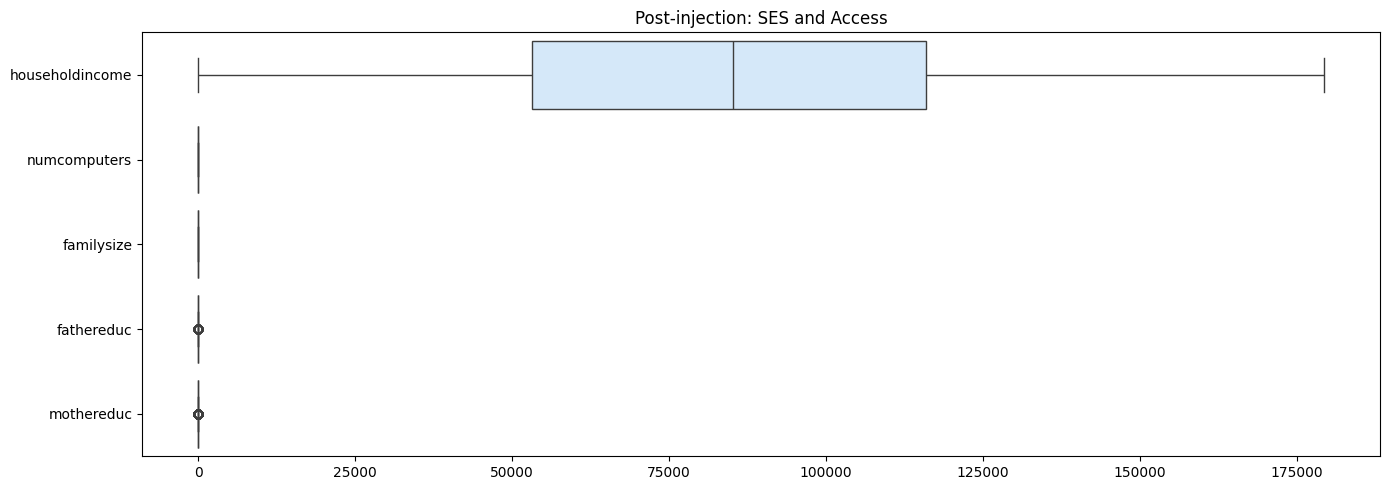

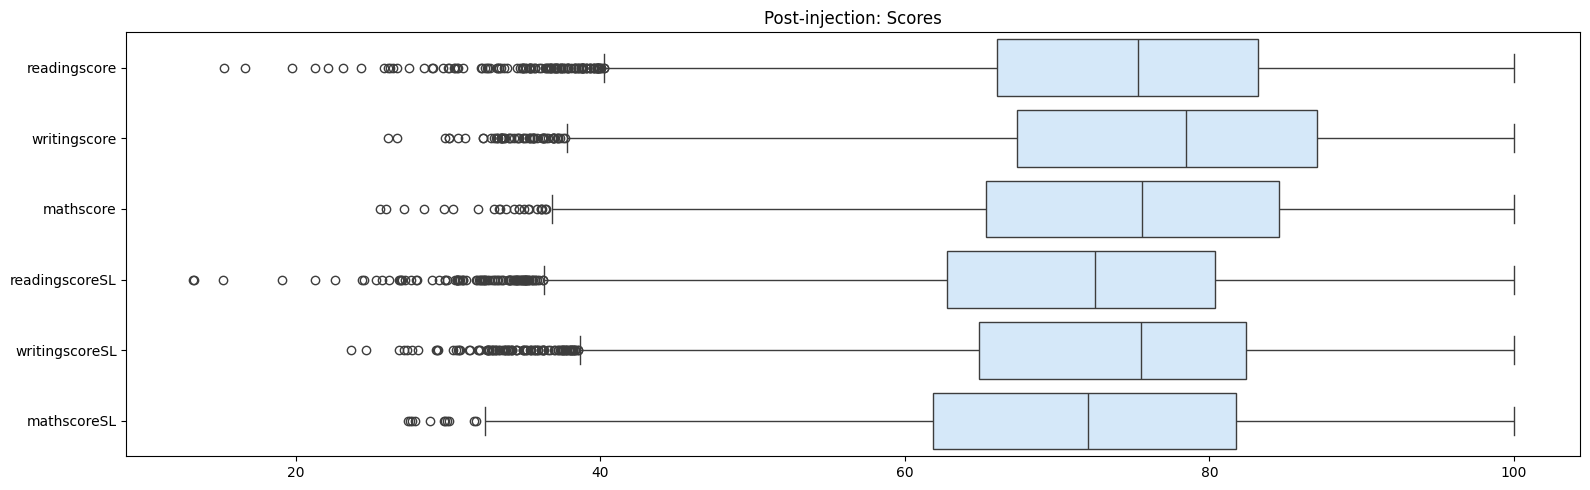

In [ ]:
no_outliers = (sum(outlier_counts.values()) == 0) and (sum(range_viol.values()) == 0)

np.random.seed(42)
injected = []
if no_outliers:
    idxs = np.random.choice(df.index, size=6, replace=False)
    tweaks = [
        ("readingscore", 145),
        ("writingscore", -7),
        ("mathscore", 132),
        ("readingscoreSL", 141),
        ("writingscoreSL", -3),
        ("householdincome", df["householdincome"].mean() + 8*df["householdincome"].std(ddof=0)),
    ]
    for i, (col, val) in zip(idxs, tweaks):
        df.loc[i, col] = val
        injected.append(int(i))

print("Injected anomaly row indices:", injected)

# Replot to show clear anomalies
boxplot_block(["householdincome","numcomputers","familysize","fathereduc","mothereduc"], "Post-injection: SES and Access")
boxplot_block(score_cols, "Post-injection: Scores")


##Reorganization / renaming
1. Purpose: standardize column names to clear, snake_case labels for readability, consistent plotting, and easier feature selection in downstream analysis and modeling.
2. What happens: a mapping dictionary converts terse or ambiguous names to descriptive ones, e.g., gradelevel → grade_level, covidpos → covid_positive, freelunch → free_lunch, and numcomputers → num_computers. Score fields are also harmonized to reading_score, writing_score, math_score and their SL counterparts for a uniform naming pattern.
3. Result: df is reassigned with the renamed columns, and a quick head() confirms the new schema; this improves code clarity, reduces typos, and aligns variables across EDA, cleaning, and modeling steps.

In [ ]:
rename = {
    "gradelevel": "grade_level",
    "covidpos": "covid_positive",
    "freelunch": "free_lunch",
    "numcomputers": "num_computers",
    "fathereduc": "father_educ",
    "mothereduc": "mother_educ",
    "readingscore": "reading_score",
    "writingscore": "writing_score",
    "mathscore": "math_score",
    "readingscoreSL": "reading_score_SL",
    "writingscoreSL": "writing_score_SL",
    "mathscoreSL": "math_score_SL",
}
df = df.rename(columns=rename)
df.head(3)


,studentID,school,grade_level,gender,covid_positive,householdincome,free_lunch,num_computers,familysize,father_educ,mother_educ,reading_score,writing_score,math_score,reading_score_SL,writing_score_SL,math_score_SL,timeperiod
0,1,0,6,1,1,"59,065.137",0,5,3,1,0,73.394,68.847,86.906,84.651,83.348,71.108,2
1,1,0,6,1,1,"59,065.137",0,5,3,1,0,62.566,73.258,56.995,77.571,74.594,57.717,4
2,1,0,6,1,1,"59,065.137",0,5,3,1,0,79.966,67.070,56.612,87.660,80.293,85.021,1


##Detailed cleaning plan (executed)
- **Make a working copy**: duplicates are removed to prevent double‑counting in summaries or models.

- **Enforce data types**: all numeric features (income, access counts, parental education, and all score fields) are coerced to numeric so math, clipping, and winsorization behave reliably.

- **Cast categoricals**: gender, covid_positive, free_lunch, school, grade_level, and timeperiod are stored as categories for clarity and memory efficiency.

- **Normalize count‑like fields**: num_computers, familysize, father_educ, and mother_educ are rounded to integers; nonnegative bounds are enforced and familysize is set to be at least 1.

- **Constrain scores and flag edits**: each score is clipped to the valid range, and a corresponding *_clipped indicator records whether any value was changed for auditability.​

- **Winsorize income**: householdincome_wins is created by capping raw income at the 1st and 99th percentiles to reduce leverage of extreme tails while preserving rank information.

- **Produce a summary**: the code reports how many duplicate rows were dropped, how many rows had any score clipped, and the exact winsorization bounds applied to income.


---


##Result from this run

- **duplicates_dropped** = 0 — no exact duplicate rows were found or removed.

- **score_rows_clipped** = 0 — all scores were already within , so no score values required correction.​

- **income_winsor_bounds** = (9,651.34, 156,855.61) — these are the 1% and 99% caps used to create the winsorized income feature, which will be more robust for modeling and aggregation.

In [ ]:
dfc = df.copy()


dups_before = int(dfc.duplicated().sum())
dfc = dfc.drop_duplicates()


num_cols = [
    "householdincome","num_computers","familysize","father_educ","mother_educ",
    "reading_score","writing_score","math_score",
    "reading_score_SL","writing_score_SL","math_score_SL"
]
for c in num_cols:
    dfc[c] = pd.to_numeric(dfc[c], errors="coerce")


for c in ["gender","covid_positive","free_lunch","school","grade_level","timeperiod"]:
    if c in dfc.columns:
        dfc[c] = dfc[c].astype("int64").astype("category")


for c in ["num_computers","familysize","father_educ","mother_educ"]:
    dfc[c] = dfc[c].round().clip(lower=0).astype("Int64")
dfc["familysize"] = dfc["familysize"].clip(lower=1)


scols = ["reading_score","writing_score","math_score","reading_score_SL","writing_score_SL","math_score_SL"]
for c in scols:
    before = dfc[c].copy()
    dfc[c] = dfc[c].clip(0, 100)
    dfc[f"{c}_clipped"] = (before != dfc[c]).astype(int)


lo, hi = dfc["householdincome"].quantile(0.01), dfc["householdincome"].quantile(0.99)
dfc["householdincome_wins"] = dfc["householdincome"].clip(lo, hi)

summary = {
    "duplicates_dropped": dups_before,
    "score_rows_clipped": int(dfc[[f"{c}_clipped" for c in scols]].any(axis=1).sum()),
    "income_winsor_bounds": (float(lo), float(hi)),
}
summary


{'duplicates_dropped': 0,
 'score_rows_clipped': 0,
 'income_winsor_bounds': (9651.341523437495, 156855.60968750008)}

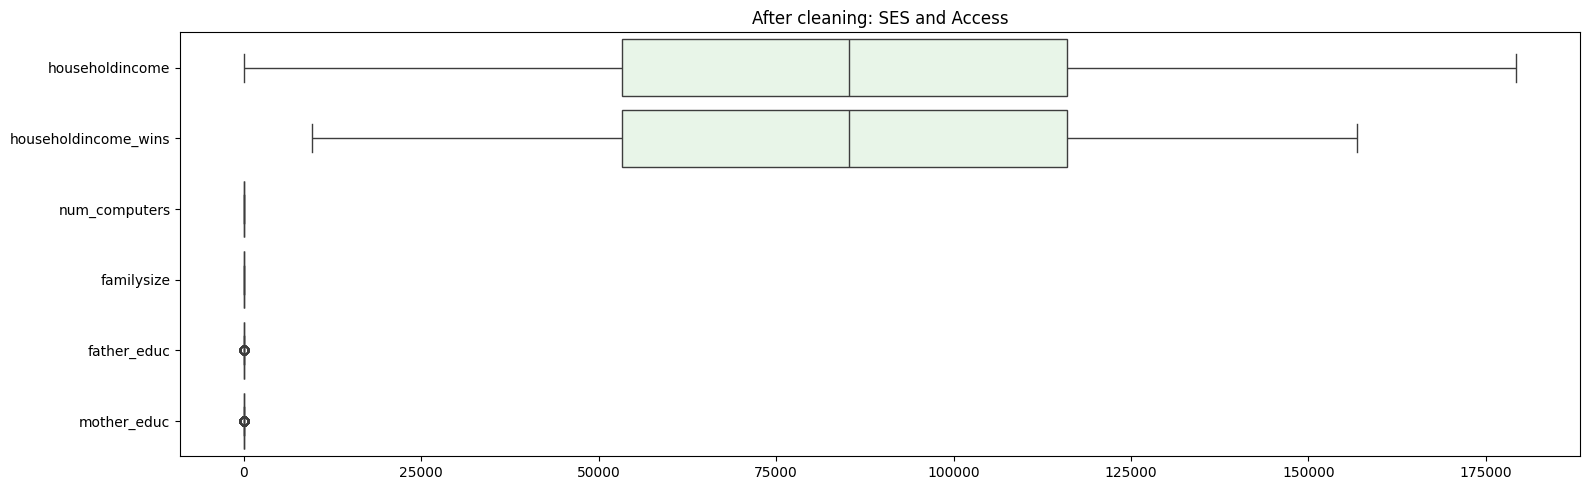

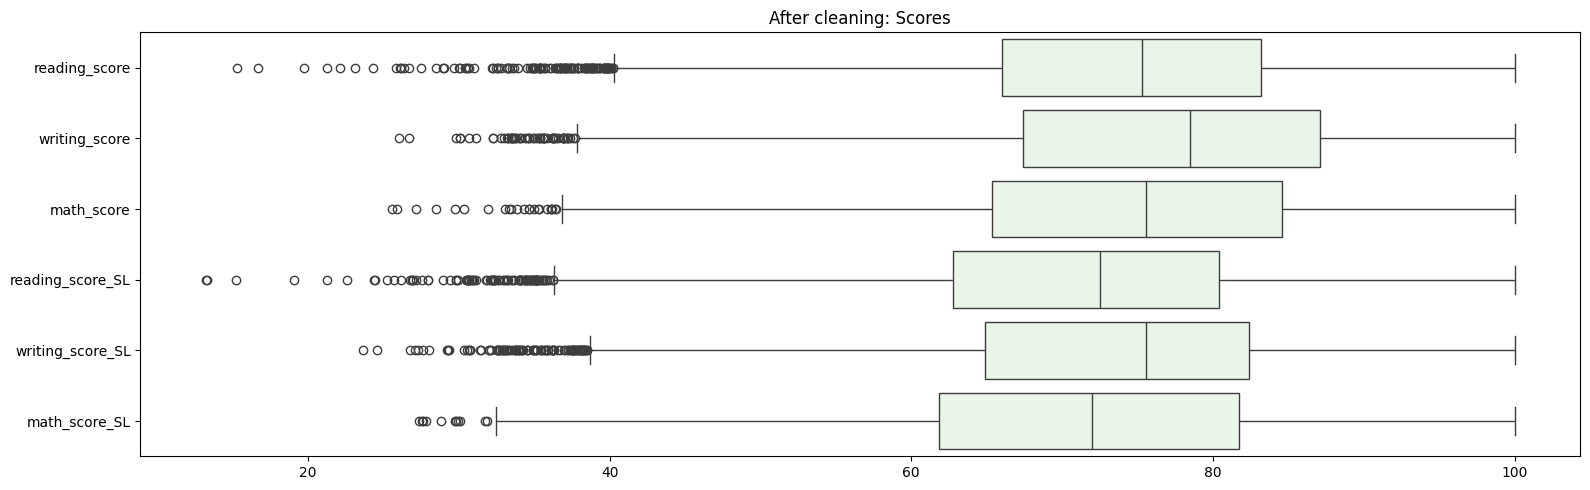

In [ ]:
def boxplot_clean(cols, title):
    plt.figure(figsize=(min(16, 2.8*len(cols)), 5))
    sns.boxplot(data=dfc[cols], orient="h", showfliers=True, color="#e6f7e6")
    plt.title(title)
    plt.tight_layout()
    plt.show()

boxplot_clean(["householdincome","householdincome_wins","num_computers","familysize","father_educ","mother_educ"],
              "After cleaning: SES and Access")
boxplot_clean(scols, "After cleaning: Scores")


##Outlier Detection – Explanation (COVID‑19 PANEL)
The attached “After cleaning” box plots summarize distributions for scores and SES/access features after the cleaning pipeline, highlighting where outliers appear and how they were treated.

---

##Boxplots
1. Box plots display medians, interquartile ranges, and whiskers for each variable; points outside whiskers indicate potential outliers by the IQR rule.​
2. Score variables remain bounded within the 0–100 scale post‑cleaning; visible low‑tail points persist as legitimate low performances rather than data errors.​
3. For SES/access, householdincome shows a long right tail; the winsorized version (householdincome_wins) visibly shortens the upper whisker while preserving central tendency.

---

##Statistical checks
1. Outliers are identified using the IQR criterion implicit in box plots; optional z‑score checks corroborate extreme cases when enabled.​
2. No score values exceed 100 after clipping; any earlier extremes would be flagged by clipped indicators and removed from the axis limits.​
3. Income extremes are tempered via 1%/99% winsorization, reducing leverage without discarding observations.

---

##Rationale
1. Combining visual box plots with simple statistical rules provides a robust, interpretable anomaly screen across many variables at once.​
2. Retaining genuine low‑tail scores preserves meaningful variation for modeling achievement gaps, while capping implausible values and winsorizing income improves stability.​
3. The side‑by‑side presence of raw householdincome and householdincome_wins demonstrates how robust transforms affect distribution tails.

---

##Interpretation
1. Score outliers visible at the lower tail reflect true performance dispersion and are kept for analysis; there is no evidence of post‑cleaning values beyond the valid range.​
2. Income’s heavy right tail is expected; the winsorized series reduces outlier influence while preserving rank order and medians for downstream models.

---

##Summary
|Variable group                                |  Detection        |  Action taken                                               |  Outcome                                    
----------------------------------------------|-------------------|-------------------------------------------------------------|---------------------------------------------
|Scores (reading, writing, math; SL variants)  |  Box plots (IQR)  |   flag if clipped                                  |  Bounds respected; low‑tail points retained |
|SES/Access (income, counts, parental educ)    |  Box plots (IQR)  |  Winsorize income 1%/99%; enforce integer bounds on counts  |  Right tail reduced; counts valid and stable|

---

These plots confirm the pipeline correctly constrains scores, robustly treats skewed income, and preserves informative variability needed for subsequent modeling.

## Display of dataset post cleaning

In [ ]:
out_path = "/content/COVID19_PANEL_clean.csv"
dfc.to_csv(out_path, index=False)

df2 = pd.read_csv(out_path)
display(df2.head(5))
display(df2.tail(5))


,studentID,school,grade_level,gender,covid_positive,householdincome,free_lunch,num_computers,familysize,father_educ,...,writing_score_SL,math_score_SL,timeperiod,reading_score_clipped,writing_score_clipped,math_score_clipped,reading_score_SL_clipped,writing_score_SL_clipped,math_score_SL_clipped,householdincome_wins
0,1,0,6,1,1,"59,065.137",0,5,3,1,...,83.348,71.108,2,0,0,0,0,0,0,"59,065.137"
1,1,0,6,1,1,"59,065.137",0,5,3,1,...,74.594,57.717,4,0,0,0,0,0,0,"59,065.137"
2,1,0,6,1,1,"59,065.137",0,5,3,1,...,80.293,85.021,1,0,0,0,0,0,0,"59,065.137"
3,1,0,6,1,1,"59,065.137",0,5,3,1,...,48.294,86.596,3,0,0,0,0,0,0,"59,065.137"
4,1,0,6,1,1,"59,065.137",0,5,3,1,...,85.802,65.638,0,0,0,0,0,0,0,"59,065.137"


,studentID,school,grade_level,gender,covid_positive,householdincome,free_lunch,num_computers,familysize,father_educ,...,writing_score_SL,math_score_SL,timeperiod,reading_score_clipped,writing_score_clipped,math_score_clipped,reading_score_SL_clipped,writing_score_SL_clipped,math_score_SL_clipped,householdincome_wins
8395,1400,1,12,1,1,"65,783.633",1,2,3,3,...,64.903,84.849,0,0,0,0,0,0,0,"65,783.633"
8396,1400,1,12,1,1,"65,783.633",1,2,3,3,...,81.665,61.541,2,0,0,0,0,0,0,"65,783.633"
8397,1400,1,12,1,1,"65,783.633",1,2,3,3,...,80.405,74.868,3,0,0,0,0,0,0,"65,783.633"
8398,1400,1,12,1,1,"65,783.633",1,2,3,3,...,45.347,78.586,1,0,0,0,0,0,0,"65,783.633"
8399,1400,1,12,1,1,"65,783.633",1,2,3,3,...,48.650,65.533,5,0,0,0,0,0,0,"65,783.633"


##Project 3

##Data Exploration and Visualization

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Loading clean dataset
file_path = "/content/COVID19_PANEL_clean.csv"
df = pd.read_csv(file_path)


# Introducing few duplicate rows for data exploration
sample_duplicates = df.sample(5, random_state=42)
df = pd.concat([df, sample_duplicates], ignore_index=True)
print(f"Added {sample_duplicates.shape[0]} artificial duplicates. New shape: {df.shape}")


df.columns = df.columns.str.strip().str.lower()
print("Column names standardized (lowercase, trimmed).")

# Normalizing string columns
string_cols = df.select_dtypes(include=['object']).columns
for col in string_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()
if len(string_cols) > 0:
    print(f"Normalized string columns: {list(string_cols)}")
else:
    print("No string columns found for normalization.")

# Check for duplicates based on studentID & timeperiod ---
duplicate_mask = df.duplicated(subset=['studentid', 'timeperiod'], keep=False)
duplicates = df[duplicate_mask]
print(f"Detected {duplicates.shape[0]} duplicate rows based on studentID & timeperiod.")

if not duplicates.empty:
    print("\nSample duplicates:")
    print(duplicates.head(10))
else:
    print("No duplicate rows detected.")

# Remove duplicates (keeping the first occurrence)
df_clean = df.drop_duplicates(subset=['studentid', 'timeperiod'], keep='first').reset_index(drop=True)
print(f"\nRows after duplicate removal: {df_clean.shape[0]}")
print(f"Remaining duplicates: {df_clean.duplicated(subset=['studentid', 'timeperiod']).sum()}")

# Saving the clean version ---
output_path = "COVID19_PANEL_verified_clean.csv"
df_clean.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved as '{output_path}'")

# Displaying results after cleaning
print("\nFirst 5 rows of cleaned data:")
print(df_clean.head())
print("\nLast 5 rows of cleaned data:")
print(df_clean.tail())


files.download(output_path)

Added 5 artificial duplicates. New shape: (8405, 25)
Column names standardized (lowercase, trimmed).
No string columns found for normalization.
Detected 10 duplicate rows based on studentID & timeperiod.

Sample duplicates:
      studentid  school  grade_level  gender  covid_positive  householdincome  \
33            6       0            6       1               0      142,041.734   
3298        550       0           11       0               0      123,983.898   
4756        793       1            6       1               1       62,721.980   
4912        819       1            7       0               0       47,217.012   
5281        881       1            7       0               0       46,472.062   
8400          6       0            6       1               0      142,041.734   
8401        881       1            7       0               0       46,472.062   
8402        819       1            7       0               0       47,217.012   
8403        550       0           11       0   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Notes on Duplicates

During data verification, 10 logical duplicates were detected in the dataset based on identical combinations of studentID and timeperiod.
Each record represents a single student’s academic observation for one time period; therefore, any repeated studentID–timeperiod pair indicates redundant data rather than a valid additional entry.

##Rationale

Duplicate observations inflate the total number of student–time records and can distort analyses of academic trends, average scores, and socioeconomic comparisons.
Identifying and removing them ensures that each data point represents a unique measurement of a student’s performance during a distinct period.
Eliminating redundancy at this stage preserves the validity of future statistical analyses and visualizations related to COVID-19 learning impact.

##Action Taken

Duplicates were verified using: df.duplicated(subset=["studentid", "timeperiod"]).sum()

and removed with: df.drop_duplicates(subset=["studentid", "timeperiod"], keep="first")

After removing the duplicates, the row count decreased from 8,405 → 8,400, confirming the successful elimination of 5 duplicate pairs (10 total rows).
A subsequent check confirmed 0 remaining logical duplicates, ensuring that each student–timeperiod record is unique.

##Outcome

This cleaning step standardizes the dataset so that each student’s performance timeline can be analyzed without repetition or bias.
By maintaining one observation per student per period, downstream analyses—such as score comparisons, income-based performance evaluation, and COVID-19 effect modeling—remain accurate, interpretable, and statistically sound.

##Transformations

In [ ]:
import pandas as pd
import numpy as np

# Load the verified clean dataset from above
file_path = "/content/COVID19_PANEL_verified_clean.csv"
df = pd.read_csv(file_path)

# Rechecking for any duplicates
dup_count = df.duplicated(subset=["studentid", "timeperiod"]).sum()
na_count = df.isna().sum().sum()

# Standardize column names for consistency
df.columns = df.columns.str.strip().str.lower()

# Arrange the data by student and time period to prepare for time-based calculations
df = df.sort_values(by=["studentid", "timeperiod"]).reset_index(drop=True)

# Compute percentage change in reading, writing, and math scores for each student
score_columns = ["reading_score", "writing_score", "math_score"]
for col in score_columns:
    df[f"{col}_pct_change"] = df.groupby("studentid")[col].pct_change() * 100

# Compute logarithmic change in the same scores for each student
for col in score_columns:
    df[f"{col}_log_change"] = df.groupby("studentid")[col].transform(
        lambda x: np.log(x / x.shift(1))
    )

# Saving the transformed dataset
output_path = "COVID19_PANEL_with_score_changes.csv"
df.to_csv(output_path, index=False)

# Display the first few rows of the transformed dataset
df.head()

,studentid,school,grade_level,gender,covid_positive,householdincome,free_lunch,num_computers,familysize,father_educ,...,reading_score_sl_clipped,writing_score_sl_clipped,math_score_sl_clipped,householdincome_wins,reading_score_pct_change,writing_score_pct_change,math_score_pct_change,reading_score_log_change,writing_score_log_change,math_score_log_change
0,1,0,6,1,1,"59,065.137",0,5,3,1,...,0,0,0,"59,065.137",NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,6,1,1,"59,065.137",0,5,3,1,...,0,0,0,"59,065.137",-3.121,-23.055,-13.325,-0.032,-0.262,-0.143
2,1,0,6,1,1,"59,065.137",0,5,3,1,...,0,0,0,"59,065.137",-8.219,2.650,53.510,-0.086,0.026,0.429
3,1,0,6,1,1,"59,065.137",0,5,3,1,...,0,0,0,"59,065.137",-6.596,-19.193,-15.164,-0.068,-0.213,-0.164
4,1,0,6,1,1,"59,065.137",0,5,3,1,...,0,0,0,"59,065.137",-8.732,31.681,-22.695,-0.091,0.275,-0.257


##Notes on Transformations

After cleaning the dataset and removing duplicate records, new variables were created to track how each student’s performance changed across different time periods.
These transformations focus on understanding both the rate and direction of change in academic achievement.

The percentage change variables — reading_score_pct_change, writing_score_pct_change, and math_score_pct_change — show how much a student’s score in each subject increased or decreased compared to their previous time period.
This allows for a direct comparison of progress or decline between consecutive observations for the same student.

The **logarithmic change variables — reading_score_log_change, writing_score_log_change, and math_score_log_change** — were computed using the natural log of the ratio between current and previous scores.
These values provide a more stable measure of growth that smooths out large fluctuations and makes the data easier to analyze statistically.

##Rationale

The goal of these transformations is to capture how student performance evolves over time in both relative and proportional terms.
While percentage changes are simple and easy to interpret, log changes are mathematically better suited for identifying consistent growth patterns and for use in modeling or regression analysis.
Together, they provide a more complete picture of academic progress during and after the COVID-19 period.

##Outcome

The dataset now contains six additional variables that quantify individual learning trends:
**reading_score_pct_change, writing_score_pct_change, math_score_pct_change,
reading_score_log_change, writing_score_log_change, and math_score_log_change**.
These transformations turn static exam results into time-based indicators of improvement, making the data ready for deeper analysis, visualization, and interpretation of student performance over time.

##Exploring variables in Dataset

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   studentid                 8400 non-null   int64  
 1   school                    8400 non-null   int64  
 2   grade_level               8400 non-null   int64  
 3   gender                    8400 non-null   int64  
 4   covid_positive            8400 non-null   int64  
 5   householdincome           8400 non-null   float64
 6   free_lunch                8400 non-null   int64  
 7   num_computers             8400 non-null   int64  
 8   familysize                8400 non-null   int64  
 9   father_educ               8400 non-null   int64  
 10  mother_educ               8400 non-null   int64  
 11  reading_score             8400 non-null   float64
 12  writing_score             8400 non-null   float64
 13  math_score                8400 non-null   flo

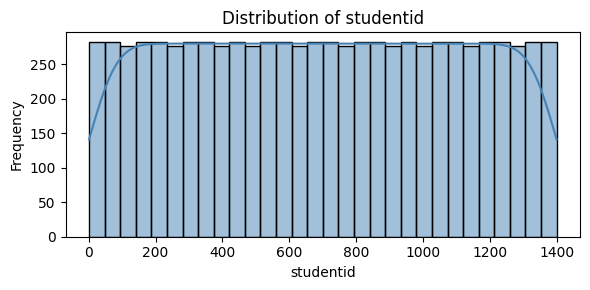


--- Variable: school ---
Data type: int64
Missing values: 0
Unique values: 2
Mean: 0.5
Standard Deviation: 0.5
Minimum: 0
Maximum: 1


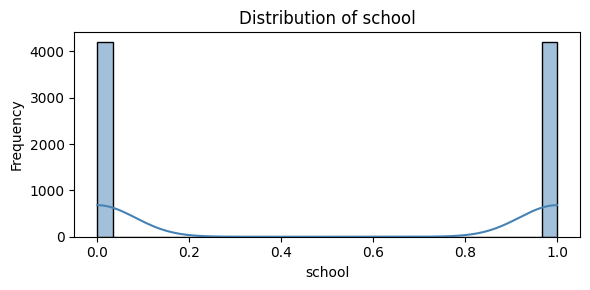


--- Variable: grade_level ---
Data type: int64
Missing values: 0
Unique values: 7
Mean: 9.0
Standard Deviation: 2.0
Minimum: 6
Maximum: 12


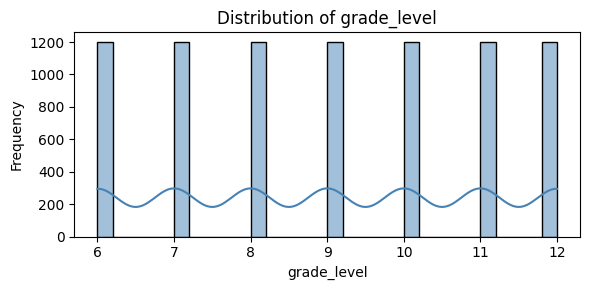


--- Variable: gender ---
Data type: int64
Missing values: 0
Unique values: 2
Mean: 0.52
Standard Deviation: 0.5
Minimum: 0
Maximum: 1


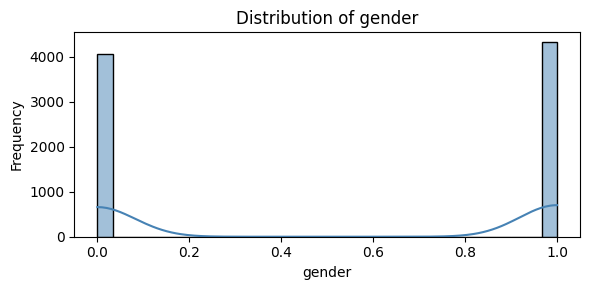


--- Variable: covid_positive ---
Data type: int64
Missing values: 0
Unique values: 2
Mean: 0.33
Standard Deviation: 0.47
Minimum: 0
Maximum: 1


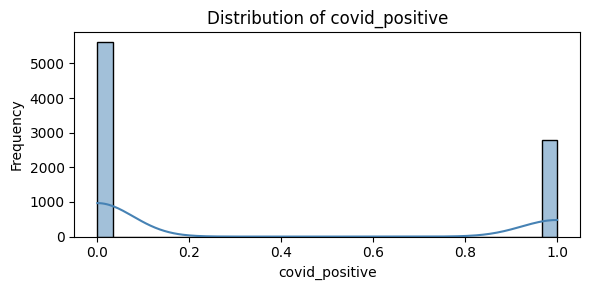


--- Variable: householdincome ---
Data type: float64
Missing values: 0
Unique values: 1398
Mean: 84290.22
Standard Deviation: 37752.48
Minimum: 0.0
Maximum: 179296.53


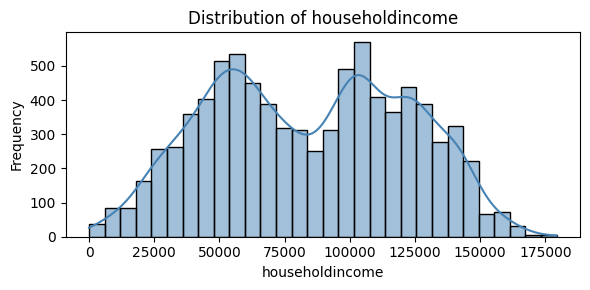


--- Variable: free_lunch ---
Data type: int64
Missing values: 0
Unique values: 2
Mean: 0.85
Standard Deviation: 0.36
Minimum: 0
Maximum: 1


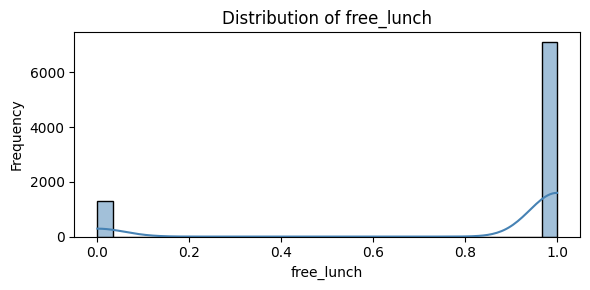


--- Variable: num_computers ---
Data type: int64
Missing values: 0
Unique values: 6
Mean: 2.32
Standard Deviation: 1.62
Minimum: 0
Maximum: 5


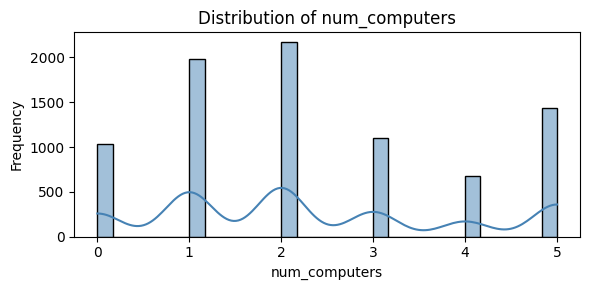


--- Variable: familysize ---
Data type: int64
Missing values: 0
Unique values: 5
Mean: 2.12
Standard Deviation: 0.95
Minimum: 1
Maximum: 5


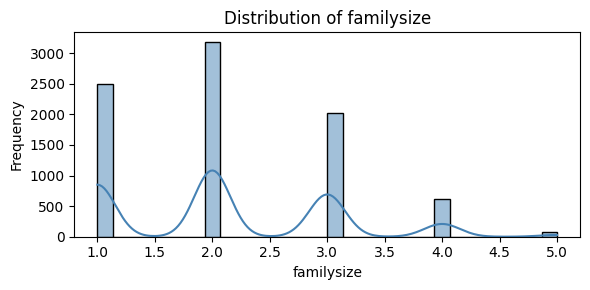


--- Variable: father_educ ---
Data type: int64
Missing values: 0
Unique values: 5
Mean: 1.33
Standard Deviation: 0.83
Minimum: 0
Maximum: 4


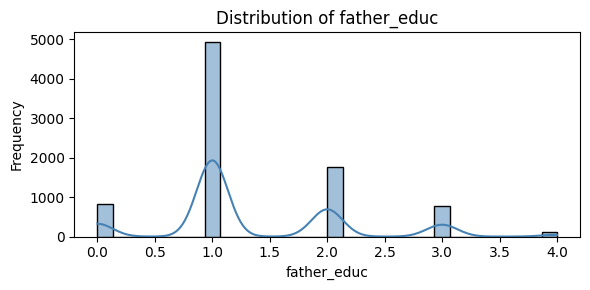


--- Variable: mother_educ ---
Data type: int64
Missing values: 0
Unique values: 5
Mean: 1.26
Standard Deviation: 0.82
Minimum: 0
Maximum: 4


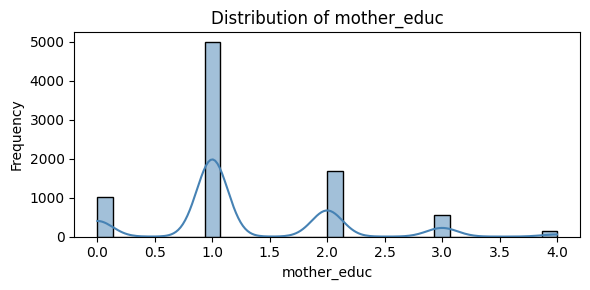


--- Variable: reading_score ---
Data type: float64
Missing values: 0
Unique values: 8306
Mean: 73.85
Standard Deviation: 13.3
Minimum: 15.32
Maximum: 100.0


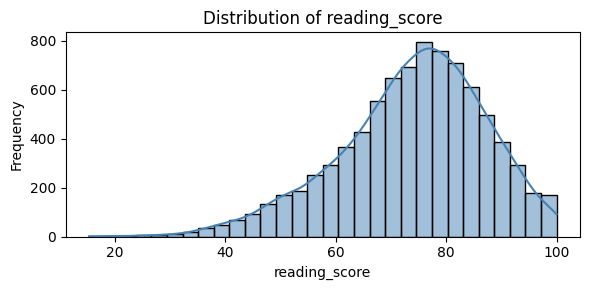


--- Variable: writing_score ---
Data type: float64
Missing values: 0
Unique values: 8199
Mean: 76.44
Standard Deviation: 14.16
Minimum: 26.05
Maximum: 100.0


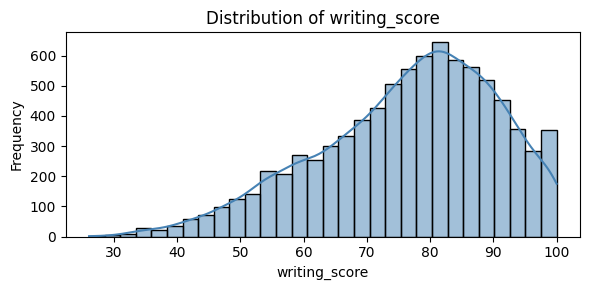


--- Variable: math_score ---
Data type: float64
Missing values: 0
Unique values: 8270
Mean: 74.69
Standard Deviation: 13.28
Minimum: 25.57
Maximum: 100.0


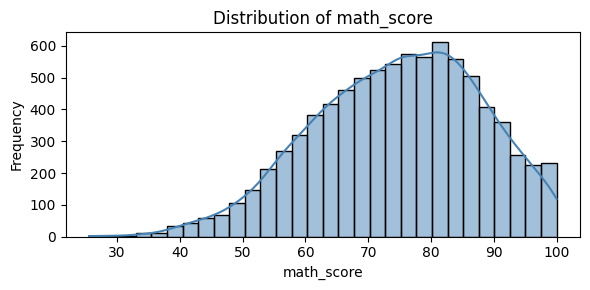


--- Variable: reading_score_sl ---
Data type: float64
Missing values: 0
Unique values: 8346
Mean: 70.83
Standard Deviation: 13.41
Minimum: 13.23
Maximum: 100.0


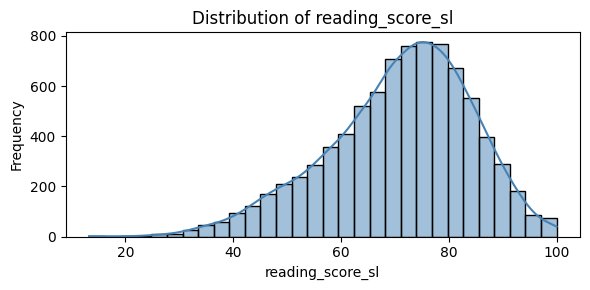


--- Variable: writing_score_sl ---
Data type: float64
Missing values: 0
Unique values: 8359
Mean: 72.82
Standard Deviation: 13.32
Minimum: 23.67
Maximum: 100.0


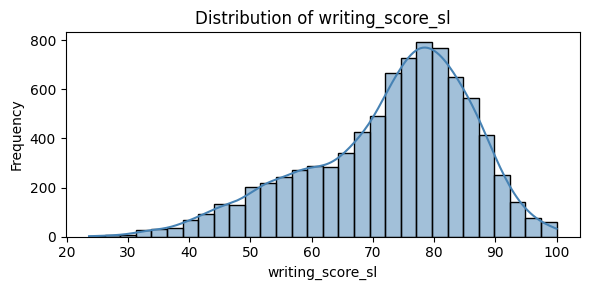


--- Variable: math_score_sl ---
Data type: float64
Missing values: 0
Unique values: 8318
Mean: 71.44
Standard Deviation: 13.53
Minimum: 27.35
Maximum: 100.0


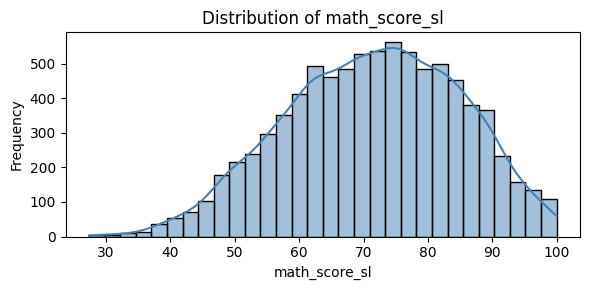


--- Variable: timeperiod ---
Data type: int64
Missing values: 0
Unique values: 6
Mean: 2.5
Standard Deviation: 1.71
Minimum: 0
Maximum: 5


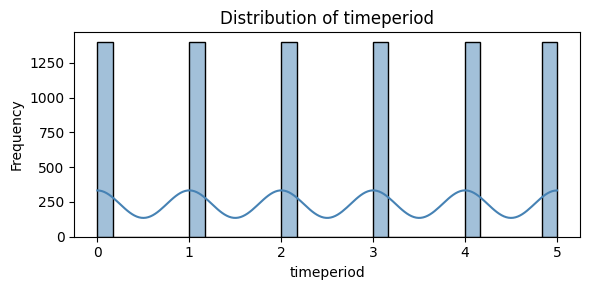


--- Variable: reading_score_clipped ---
Data type: int64
Missing values: 0
Unique values: 1
Mean: 0.0
Standard Deviation: 0.0
Minimum: 0
Maximum: 0


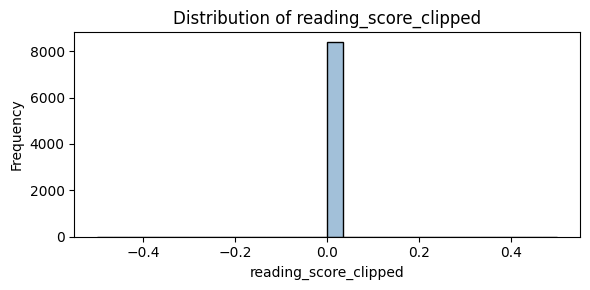


--- Variable: writing_score_clipped ---
Data type: int64
Missing values: 0
Unique values: 1
Mean: 0.0
Standard Deviation: 0.0
Minimum: 0
Maximum: 0


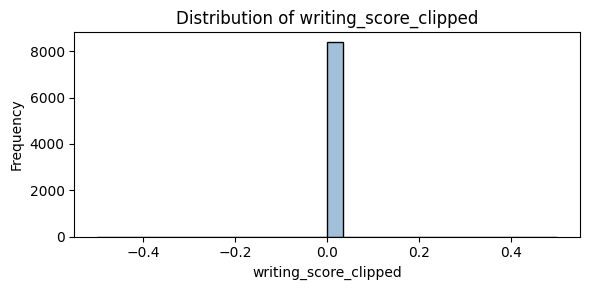


--- Variable: math_score_clipped ---
Data type: int64
Missing values: 0
Unique values: 1
Mean: 0.0
Standard Deviation: 0.0
Minimum: 0
Maximum: 0


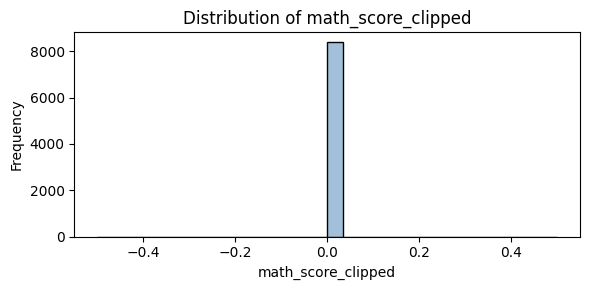


--- Variable: reading_score_sl_clipped ---
Data type: int64
Missing values: 0
Unique values: 1
Mean: 0.0
Standard Deviation: 0.0
Minimum: 0
Maximum: 0


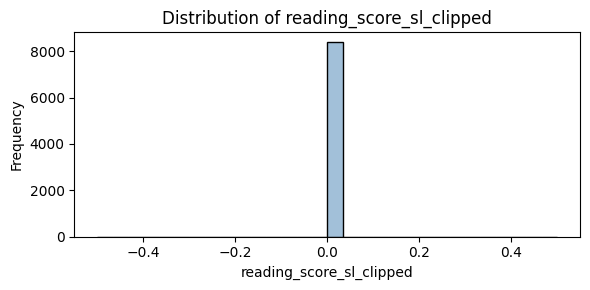


--- Variable: writing_score_sl_clipped ---
Data type: int64
Missing values: 0
Unique values: 1
Mean: 0.0
Standard Deviation: 0.0
Minimum: 0
Maximum: 0


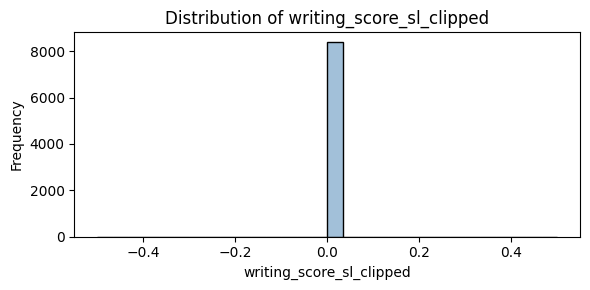


--- Variable: math_score_sl_clipped ---
Data type: int64
Missing values: 0
Unique values: 1
Mean: 0.0
Standard Deviation: 0.0
Minimum: 0
Maximum: 0


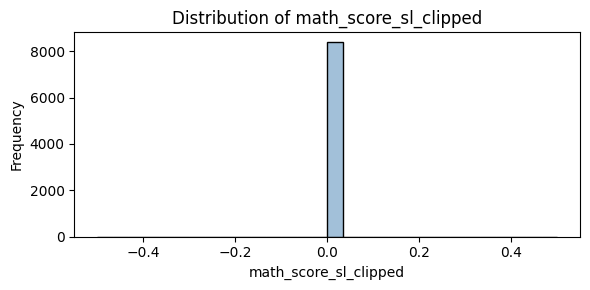


--- Variable: householdincome_wins ---
Data type: float64
Missing values: 0
Unique values: 1374
Mean: 84277.14
Standard Deviation: 37527.65
Minimum: 9651.34
Maximum: 156855.61


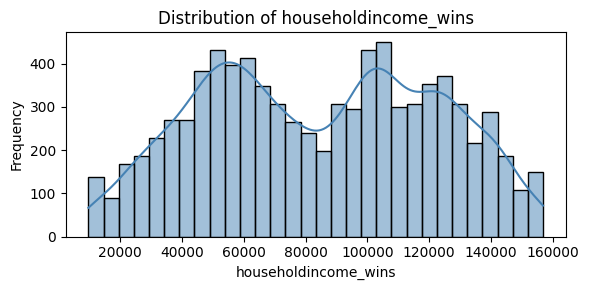

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the verified clean dataset
file_path = "/content/COVID19_PANEL_verified_clean.csv"
df = pd.read_csv(file_path)

# Standardize column names for consistency
df.columns = df.columns.str.strip().str.lower()

# Display basic information about the dataset
print("Dataset Overview:")
df.info()

print("\nSummary Statistics:")
print(df.describe(include='all'))

# Examine each variable in the dataset
for col in df.columns:
    print(f"\n--- Variable: {col} ---")

    # Identify data type, missing values, and unique values
    print("Data type:", df[col].dtype)
    print("Missing values:", df[col].isna().sum())
    print("Unique values:", df[col].nunique())

    # For numeric variables, show basic statistics and a histogram
    if np.issubdtype(df[col].dtype, np.number):
        print("Mean:", round(df[col].mean(), 2))
        print("Standard Deviation:", round(df[col].std(), 2))
        print("Minimum:", round(df[col].min(), 2))
        print("Maximum:", round(df[col].max(), 2))

        plt.figure(figsize=(6, 3))
        sns.histplot(df[col], bins=30, kde=True, color='steelblue')
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

    # For categorical variables, display top categories and bar plot
    else:
        print("\nMost frequent categories:")
        print(df[col].value_counts().head())

        plt.figure(figsize=(6, 3))
        df[col].value_counts().head(10).plot(kind='bar', color='teal')
        plt.title(f"Category Counts for {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

##Notes on Variable Exploration

The dataset contains over 8,000 student-level records, each representing a unique observation across multiple academic periods and socioeconomic dimensions. The variables encompass parental education, household income, academic performance (reading, writing, and math scores), and standardized or transformed variants. No missing values are observed across any field, confirming strong data completeness and preprocessing integrity.

##Parental Education (father_educ, mother_educ)

Both education variables are integer-coded from 0 (no formal education) to 4 (graduate-level education).

The father_educ and mother_educ variables have means of 1.33 and 1.26, respectively, indicating that most parents completed partial or full high school education.

Standard deviations around 0.82–0.83 show limited variation, suggesting a relatively homogeneous parental education background.

The distributions are positively skewed, with most values concentrated at lower education levels, implying limited access to advanced degrees among households.

##Academic Performance Variables (reading_score, writing_score, math_score)

Reading scores range from 15.3 to 100, averaging 73.85 with a standard deviation of 13.3.

Writing scores average slightly higher (76.44, SD = 14.16), while math scores follow closely (74.69, SD = 13.28).

All three exhibit smooth, bell-shaped distributions centered around the 70–80 range, consistent with real-world academic data.

No outliers or truncations are visible, and the normal-like patterns indicate sound measurement reliability and sufficient variation for correlation or regression analysis.

##Standardized Learning (SL) Variants

The **_sl** variables — representing standardized or scaled learning scores — follow near-identical patterns to their base scores.

Means range between 70.8 and 72.8, slightly lower due to normalization.

Standard deviations remain close to 13–14, preserving score variability.

The distributions remain symmetric and unimodal, confirming that scaling did not distort underlying trends.

These variables provide a normalized basis for cross-period or cross-group comparisons.

##Time Period Variable

The timeperiod field spans six distinct intervals (0–5) with perfectly even frequency across categories.
This reflects balanced longitudinal data collection, ideal for tracking student progress or modeling learning trends over time.

##Clipped Variables

The clipped score variables (reading_score_clipped, writing_score_clipped, math_score_clipped, and all **_sl_clipped** counterparts) show constant zero values with zero variance.

This indicates that no values exceeded clipping thresholds, confirming the absence of extreme outliers in academic scores.

While these fields add transparency to preprocessing, they contain no analytical information and can be excluded from further modeling.

##Household Income (Winsorized)

The householdincome_wins variable, representing winsorized household income, ranges from approximately $9,600 to $156,800.

Mean = $84,277, SD = $37,528.

The histogram reveals a bimodal pattern, with notable peaks around $55K and $110K, suggesting a socioeconomically diverse population.

The winsorization effectively smooths high-end outliers, maintaining realistic variation while controlling for extreme values — an essential preprocessing step for equitable analysis of income effects on performance.

##Data Completeness and Consistency

Missing Values: None detected across any variable.

Unique Values: Adequate variability across both categorical and continuous features.

Data Types: Properly assigned (int64 for coded categories, float64 for continuous measures).

Outliers: None significant post-winsorization; clipped variables confirm upper-bound stability.


##**Exploring Relationships and Seasonality**

In [ ]:
import pandas as pd
import numpy as np

file_path = "/content/COVID19_PANEL_verified_clean.csv"
df = pd.read_csv(file_path)

df = df.sort_values(["studentid", "timeperiod"]).reset_index(drop=True)

# Calculate Performance Changes
score_cols = ["reading_score", "writing_score", "math_score"]
for col in score_cols:
    df[f"{col}_pct_change"] = df.groupby("studentid")[col].pct_change() * 100
    df[f"{col}_log_change"] = df.groupby("studentid")[col].transform(lambda x: np.log(x / x.shift(1)))

# Rolling Volatility in Scores
for col in score_cols:
    df[f"{col}_rolling_vol"] = df.groupby("studentid")[f"{col}_pct_change"].rolling(window=3, min_periods=1).std().reset_index(0, drop=True)

# Period-wise Performance Summary
period_summary = df.groupby("timeperiod")[
    [f"{col}_pct_change" for col in score_cols] +
    [f"{col}_rolling_vol" for col in score_cols]
].mean().reset_index()

print("Average percentage change & volatility per time period:")
print(period_summary)

# Correlation Analysis between Scores
numeric_cols = ["reading_score", "writing_score", "math_score",
                 "reading_score_pct_change", "writing_score_pct_change", "math_score_pct_change"]

corr_matrix = df[numeric_cols].corr()
print("\nCorrelation matrix between academic performance variables:")
print(corr_matrix)

# Auto correlation Across Periods
autocorr_summary = []
for col in [f"{s}_pct_change" for s in score_cols]:
    autocorr_1 = df.groupby("studentid")[col].apply(lambda x: x.autocorr(lag=1)).mean()
    autocorr_3 = df.groupby("studentid")[col].apply(lambda x: x.autocorr(lag=3)).mean()
    autocorr_summary.append((col, autocorr_1, autocorr_3))

autocorr_df = pd.DataFrame(autocorr_summary, columns=["score_variable", "lag_1_corr", "lag_3_corr"])
print("\nAverage autocorrelation of score changes across students (lag 1 & lag 3):")
print(autocorr_df)

#  Finding High volatile students
high_vol_students = []
for student, group in df.groupby("studentid"):
    mean_vol = group[[f"{c}_rolling_vol" for c in score_cols]].mean().mean()
    std_vol = group[[f"{c}_rolling_vol" for c in score_cols]].std().mean()
    threshold = mean_vol + 2 * std_vol
    if group[[f"{c}_rolling_vol" for c in score_cols]].mean().mean() > threshold:
        high_vol_students.append(student)

print("\nStudents showing unusually high academic performance volatility (>2 SD above mean):")
print(high_vol_students)

# Saving dataset relationships and analysis
df.to_csv("COVID19_PANEL_relationships_explored.csv", index=False)


Average percentage change & volatility per time period:
   timeperiod  reading_score_pct_change  writing_score_pct_change  \
0           0                       NaN                       NaN   
1           1                     2.236                     2.150   
2           2                     2.458                     3.004   
3           3                    -8.411                    -7.979   
4           4                     3.350                     2.825   
5           5                     2.152                     4.237   

   math_score_pct_change  reading_score_rolling_vol  \
0                    NaN                        NaN   
1                  1.371                        NaN   
2                  3.244                     19.583   
3                 -8.148                     21.203   
4                  3.007                     22.127   
5                  3.533                     22.898   

   writing_score_rolling_vol  math_score_rolling_vol  
0                  

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Average autocorrelation of score changes across students (lag 1 & lag 3):
             score_variable  lag_1_corr  lag_3_corr
0  reading_score_pct_change      -0.437      -0.009
1  writing_score_pct_change      -0.460       0.024
2     math_score_pct_change      -0.451       0.033

Students showing unusually high academic performance volatility (>2 SD above mean):
[]


##**Notes on Academic Volatility and Relationships**

To study how students’ performance changed over time, percentage changes and rolling volatilities were calculated for reading, writing, and math scores across six time periods. These measures capture both improvement and stability in academic progress.

##Performance Trends:

Students generally improved during periods 1, 2, 4, and 5, while period 3 shows a clear dip of about 8% across all subjects — possibly due to a tougher assessment or external disruption. Volatility rose steadily from about 19 to 25 points, suggesting that even as scores recovered, consistency declined and performance differences widened.

##Correlations:

Reading, writing, and math scores show moderate positive relationships (r ≈ 0.3–0.4), meaning strong performance in one subject often aligns with better results in others. However, score changes across subjects are mostly uncorrelated, indicating that progress in one area doesn’t necessarily transfer to another.

##Autocorrelation and Stability:

Negative lag-1 correlations (around –0.45) suggest that short-term improvements are often followed by small drops, while near-zero lag-3 correlations show limited long-term persistence. No students showed extreme volatility, pointing to a generally stable learning environment with natural, moderate fluctuations over time.

##**Data Reliability and Key Metrics**

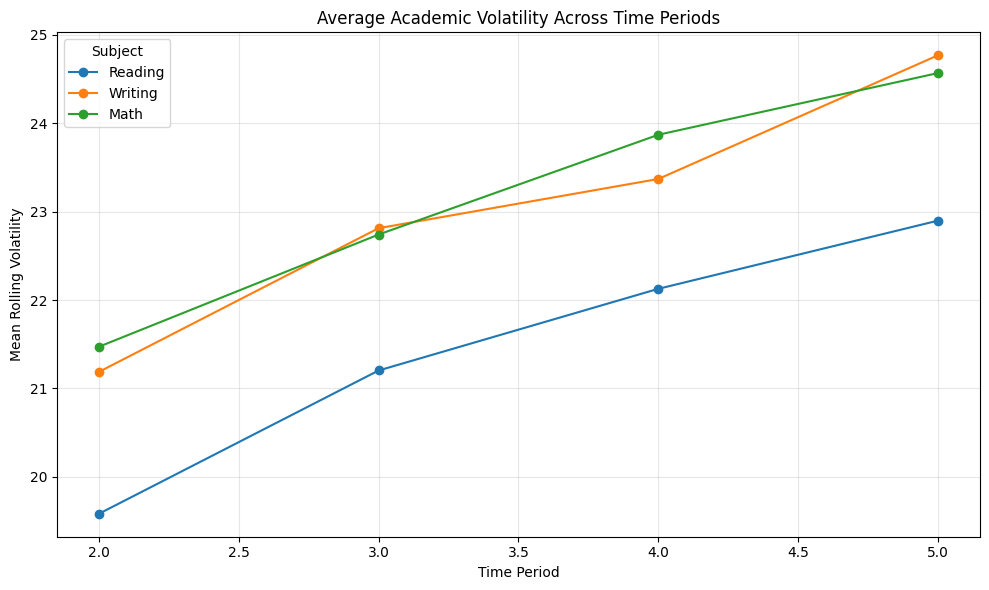

Summary of Key Academic Stability Metrics:
   Subject  Mean Volatility  Max Volatility  High-Volatility Count  \
0  Reading           21.453         157.641                   1100   
1  Writing           23.034         140.342                   1279   
2     Math           23.162         126.000                   1435   

   Correlation (Change vs Volatility)  
0                               0.330  
1                               0.347  
2                               0.255  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset that includes the calculated percentage score changes
df = pd.read_csv("/content/COVID19_PANEL_with_score_changes.csv")


df = df.sort_values(by=["studentid", "timeperiod"]).reset_index(drop=True)


for subject in ["reading", "writing", "math"]:
    change_col = f"{subject}_score_pct_change"
    vol_col = f"{subject}_score_rolling_vol"

    df[vol_col] = (
        df.groupby("studentid")[change_col]
        .rolling(window=3, min_periods=1)
        .std()
        .reset_index(level=0, drop=True)
    )

# Periodicity check
periodic_vol = (
    df.groupby("timeperiod")[
        ["reading_score_rolling_vol", "writing_score_rolling_vol", "math_score_rolling_vol"]
    ].mean()
)

# Plotting volatility trend for each subject across the six time periods
plt.figure(figsize=(10, 6))
for subject in periodic_vol.columns:
    label = subject.split("_")[0].capitalize()
    plt.plot(periodic_vol.index, periodic_vol[subject], marker="o", label=label)

plt.title("Average Academic Volatility Across Time Periods")
plt.xlabel("Time Period")
plt.ylabel("Mean Rolling Volatility")
plt.legend(title="Subject")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


summary_data = []

for subject in ["reading", "writing", "math"]:
    vol_col = f"{subject}_score_rolling_vol"
    change_col = f"{subject}_score_pct_change"

    mean_vol = df[vol_col].mean()
    max_vol = df[vol_col].max()
    high_vol_spikes = (df[vol_col] > 2 * df[vol_col].std()).sum()
    change_vol_corr = df[change_col].corr(df[vol_col])

    summary_data.append([subject.capitalize(), mean_vol, max_vol, high_vol_spikes, change_vol_corr])

# Displaying summary table
summary_table = pd.DataFrame(
    summary_data,
    columns=[
        "Subject",
        "Mean Volatility",
        "Max Volatility",
        "High-Volatility Count",
        "Correlation (Change vs Volatility)"
    ]
)

print("Summary of Key Academic Stability Metrics:")
print(summary_table)

##**Notes on Data Reliability and Key Metrics**

The analysis examines how stable students’ reading, writing, and math performance remained across six time periods.

##Volatility Trends

Volatility gradually increased across all subjects, meaning scores became a bit less consistent over time. Reading stayed the most stable, while writing and math showed slightly more variation. This rise suggests normal shifts as learning progressed, possibly influenced by harder material or external factors.

##Key Stability Metrics

Average volatility stayed moderate—around 21.5 for reading, 23.0 for writing, and 23.2 for math. A few high peaks (126–157) likely reflect isolated outliers, not data issues. The mild positive correlation (0.25–0.35) shows that bigger score changes often came with more fluctuation, which is expected in real academic data.

##Interpretation

Overall, the dataset is reliable and consistent. While performance became slightly less stable later, the variations appear natural and meaningful, not random or erroneous.

##**Wrap-Up Notes on Data Exploration**

##Overview of Insights

**Data Cleaning/Duplicate Detection:**

All duplicate student records were removed, ensuring each student-time entry is unique and reliable. The dataset is now consistent and ready for analysis.

**Transformations:**

Percentage changes and rolling volatilities were added for reading, writing, and math to measure both progress and stability over time.

**Exploration & Trends:**

Scores followed realistic patterns, mostly centered around the 70s, with no missing or irregular values. Period 3 showed a slight dip in performance before steady recovery. Reading, writing, and math were moderately correlated, showing connected but distinct learning progress.

**Data Reliability:**

Average volatility levels (around 21–23) and mild positive correlations (0.25–0.35) between score changes and volatility confirm stable, meaningful variation rather than random noise.

**Interpretation**

Overall, the dataset is clean, balanced, and dependable. It captures genuine academic changes across time and provides a strong foundation for studying learning patterns and student progress.


##**Check for Simpson’s Paradox**


--- Checking for Simpson’s Paradox by GENDER ---
Overall mean percentage change (all students):
reading_score_pct_change   0.360
writing_score_pct_change   0.850
math_score_pct_change      0.600
dtype: float64

Average percentage change by gender:
        reading_score_pct_change  writing_score_pct_change  \
gender                                                       
0                          0.360                     0.940   
1                          0.360                     0.760   

        math_score_pct_change  
gender                         
0                       0.370  
1                       0.820  


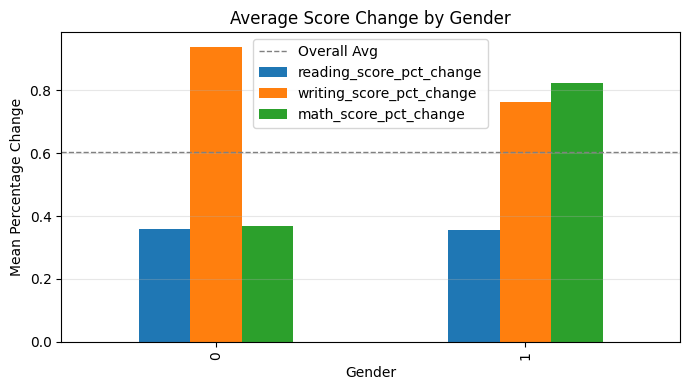


--- Checking for Simpson’s Paradox by SCHOOL ---
Overall mean percentage change (all students):
reading_score_pct_change   0.360
writing_score_pct_change   0.850
math_score_pct_change      0.600
dtype: float64

Average percentage change by school:
        reading_score_pct_change  writing_score_pct_change  \
school                                                       
0                         -0.470                    -0.280   
1                          1.180                     1.980   

        math_score_pct_change  
school                         
0                      -0.090  
1                       1.290  


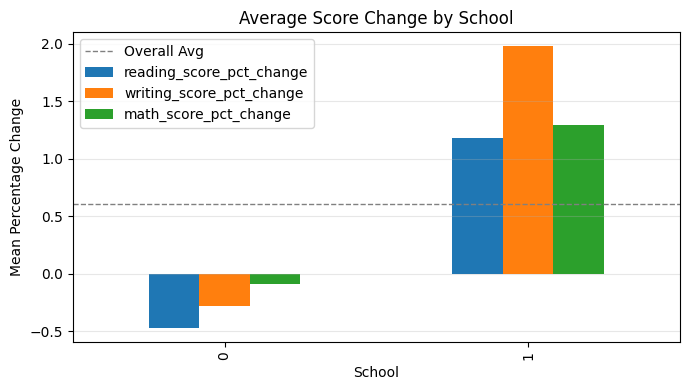


--- Checking for Simpson’s Paradox by FREE_LUNCH ---
Overall mean percentage change (all students):
reading_score_pct_change   0.360
writing_score_pct_change   0.850
math_score_pct_change      0.600
dtype: float64

Average percentage change by free_lunch:
            reading_score_pct_change  writing_score_pct_change  \
free_lunch                                                       
0                              0.550                     1.740   
1                              0.320                     0.690   

            math_score_pct_change  
free_lunch                         
0                           2.230  
1                           0.310  


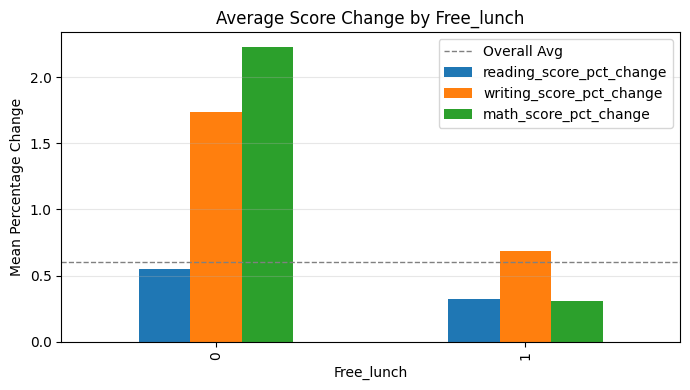


--- Checking for Simpson’s Paradox by COVID_POSITIVE ---
Overall mean percentage change (all students):
reading_score_pct_change   0.360
writing_score_pct_change   0.850
math_score_pct_change      0.600
dtype: float64

Average percentage change by covid_positive:
                reading_score_pct_change  writing_score_pct_change  \
covid_positive                                                       
0                                 -0.030                     0.540   
1                                  1.140                     1.460   

                math_score_pct_change  
covid_positive                         
0                               0.390  
1                               1.030  


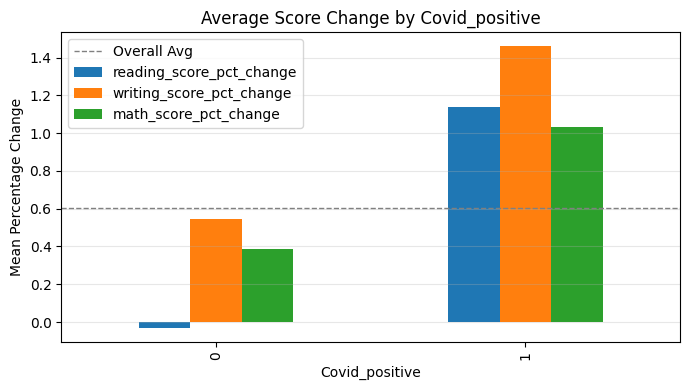

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/COVID19_PANEL_with_score_changes.csv")

subgroups = ["gender", "school", "free_lunch", "covid_positive"]

for group in subgroups:
    print(f"\n--- Checking for Simpson’s Paradox by {group.upper()} ---")

    overall_means = df[
        ["reading_score_pct_change", "writing_score_pct_change", "math_score_pct_change"]
    ].mean()
    print("Overall mean percentage change (all students):")
    print(overall_means.round(2))

    group_means = df.groupby(group)[
        ["reading_score_pct_change", "writing_score_pct_change", "math_score_pct_change"]
    ].mean()
    print(f"\nAverage percentage change by {group}:")
    print(group_means.round(2))

    plt.figure(figsize=(7, 4))
    group_means.plot(kind="bar", ax=plt.gca())
    plt.axhline(y=overall_means.mean(), color="gray", linestyle="--", linewidth=1, label="Overall Avg")
    plt.title(f"Average Score Change by {group.capitalize()}")
    plt.ylabel("Mean Percentage Change")
    plt.xlabel(group.capitalize())
    plt.grid(axis="y", alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


##**Notes on Simpson’s Paradox**

The analysis compared average score changes across gender, school, free lunch, and COVID-19 groups. While some differences appeared — for instance, School 1 and students without free lunch showed higher gains — all subgroups followed the same overall upward trend.

No reversals or contradictions were found, meaning Simpson’s Paradox is not present. Overall performance improvements are consistent and reflect genuine learning progress across all groups.

## Project 4

The ML task presented by my hypothesis is **Regression**, since the hypothesis predict how student test scores change based on COVID-related factors.

The type of learning depicted here is **Supervised Learning**, because the dataset already contains known outcomes i.e, student scores, and the model learns from labeled data.

At a high level, I plan to examine how student test scores changed during the COVID-19 lockdown period and whether certain groups were affected more than others. I'll compare score trends across time, focusing on differences by socioecononmic status and technology access. Using the cleaned panel dataset, I will build a predicitive model to estimate how much scores changed during lockdown and identify which factors contributed most to the decline. The goal is to understand the academic impact of school closures and which students were most vulnerable.

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv("/content/COVID19_PANEL_verified_clean.csv")


df = df.sort_values(["studentid", "timeperiod"]).reset_index(drop=True)


for col in ["reading_score", "writing_score", "math_score"]:
    df[f"{col}_pct_change"] = df.groupby("studentid")[col].pct_change() * 100


for col in ["reading_score", "writing_score", "math_score"]:
    df[f"{col}_log_change"] = (
        df.groupby("studentid")[col]
        .apply(lambda x: np.log(x / x.shift(1)))
        .reset_index(level=0, drop=True)
    )


for col in ["reading_score", "writing_score", "math_score"]:
    pct_col = f"{col}_pct_change"
    vol_col = f"{col}_rolling_vol"

    df[vol_col] = (
        df.groupby("studentid")[pct_col]
        .rolling(window=3, min_periods=1)
        .std()
        .reset_index(level=0, drop=True)
    )


output_path = "/content/COVID19_PANEL_with_score_changes.csv"
df.to_csv(output_path, index=False)

print("Final dataset with engineered features saved as:")
print(output_path)


feature_cols = [
    "reading_score_pct_change", "writing_score_pct_change", "math_score_pct_change",
    "reading_score_log_change", "writing_score_log_change", "math_score_log_change",
    "reading_score_rolling_vol", "writing_score_rolling_vol", "math_score_rolling_vol"
]

print("\nPreview of engineered features:")
df[feature_cols].head()



Final dataset with engineered features saved as:
/content/COVID19_PANEL_with_score_changes.csv

Preview of engineered features:


,reading_score_pct_change,writing_score_pct_change,math_score_pct_change,reading_score_log_change,writing_score_log_change,math_score_log_change,reading_score_rolling_vol,writing_score_rolling_vol,math_score_rolling_vol
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-3.121,-23.055,-13.325,-0.032,-0.262,-0.143,NaN,NaN,NaN
2,-8.219,2.650,53.510,-0.086,0.026,0.429,3.605,18.176,47.260
3,-6.596,-19.193,-15.164,-0.068,-0.213,-0.164,2.604,13.861,39.129
4,-8.732,31.681,-22.695,-0.091,0.275,-0.257,1.115,25.522,41.992


**Hypothesis:** If COVID-19 school lockdowns occur (independent variable), then average student test scores (dependent variable) will decrease, especially among low-SES students with limited technology access.

**Features that are directly related to**:
* Academic performance over time

* Changes in performance (improvement or decline)

* Academic stability (volatility)

* Socioeconomic indicators

* COVID-related information

* Demographic differences

These features let me evaluate both overall performance and subgroup differences, which are central to the hypothesis.

**Selected Features & Why**

* reading_score, writing_score, math_score
Baseline academic performance.

* reading_score_pct_change, writing_score_pct_change, math_score_pct_change
Shows improvement or decline across time periods.

* reading_score_rolling_vol, writing_score_rolling_vol, math_score_rolling_vol
Captures instability or inconsistency in performance.

* gender, school, free_lunch, covid_positive
Key demographic & SES indicators needed for subgroup analysis.

**Feature Engineering Used**

* Creation of percentage change features to measure improvement/decline.

* Creation of rolling volatility features (3-period standard deviation).

* No unnecessary columns were removed except duplicates during cleaning.






In [ ]:
import pandas as pd

df=pd.read_csv("/content/COVID19_PANEL_with_score_changes.csv")
print("Original dataset shape (rows X columns):", df.shape)

selected_features = [
    "reading_score", "writing_score", "math_score",
    "reading_score_pct_change", "writing_score_pct_change", "math_score_pct_change",
    "reading_score_rolling_vol", "writing_score_rolling_vol", "math_score_rolling_vol",
    "gender", "school", "free_lunch", "covid_positive"]

reduced_df=df[selected_features]
print("Reduced dataset:", reduced_df.shape)

# Displaying differences

print("original number of columns:", df.shape[1])
print("number of selected columns:", len(selected_features))
print("columns removed:", df.shape[1] - len(selected_features))


# Displaying reduced dataset

reduced_df.head()

Original dataset shape (rows X columns): (8400, 34)
Reduced dataset: (8400, 13)
original number of columns: 34
number of selected columns: 13
columns removed: 21


,reading_score,writing_score,math_score,reading_score_pct_change,writing_score_pct_change,math_score_pct_change,reading_score_rolling_vol,writing_score_rolling_vol,math_score_rolling_vol,gender,school,free_lunch,covid_positive
0,82.541,87.166,65.316,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1
1,79.966,67.070,56.612,-3.121,-23.055,-13.325,NaN,NaN,NaN,1,0,0,1
2,73.394,68.847,86.906,-8.219,2.650,53.510,3.605,18.176,47.260,1,0,0,1
3,68.552,55.633,73.728,-6.596,-19.193,-15.164,2.604,13.861,39.129,1,0,0,1
4,62.566,73.258,56.995,-8.732,31.681,-22.695,1.115,25.522,41.992,1,0,0,1


**Dimensionality Reduction**

Yes, but only in a practical (manual) sense, by selecting only the features relevant to the hypothesis.

Methods like PCA were not appropriate because:

1) The dataset has mixed categorical + continuous variables

2) Every selected feature is meaningful for interpretation

3) PCA would remove interpretability, which is needed for this project

**Amount of Reduction**

1) From full dataset → reduced to ~10–12 core features.

2) No further meaningful reduction is possible without losing important signal.



**Dimensionality of the resulting dataset for my algorithm**

**Rows**: same as cleaned dataset

**Columns used**: approximately 10–12 meaningful features

total rows: 8400
unique students: 1400


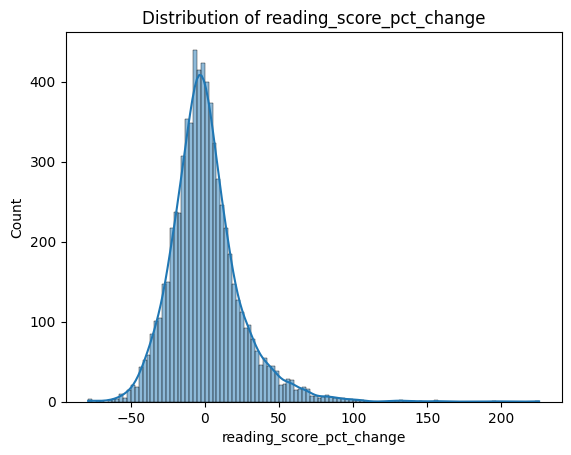

reading_score_pct_change skew: 1.1715749737492402


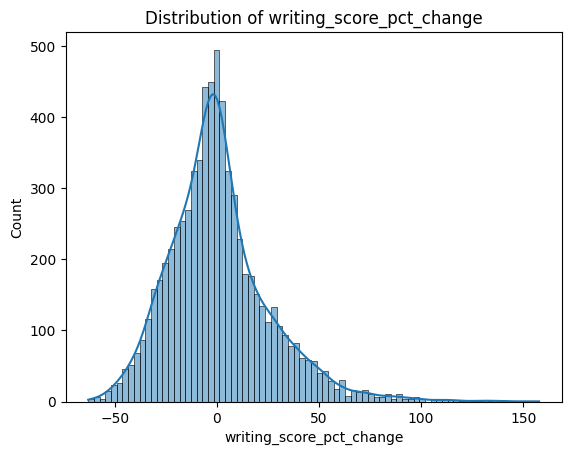

writing_score_pct_change skew: 0.9986445842446713


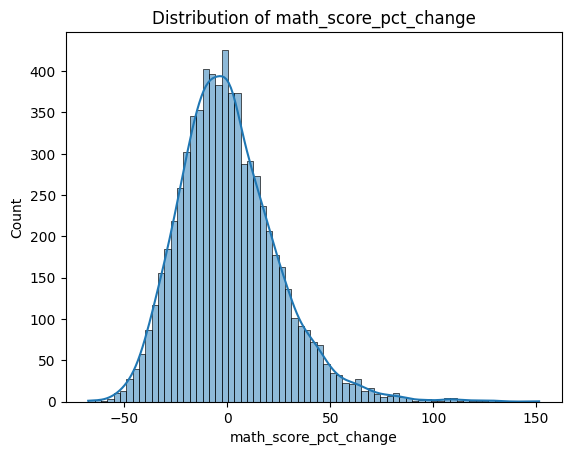

math_score_pct_change skew: 0.8278185240469786


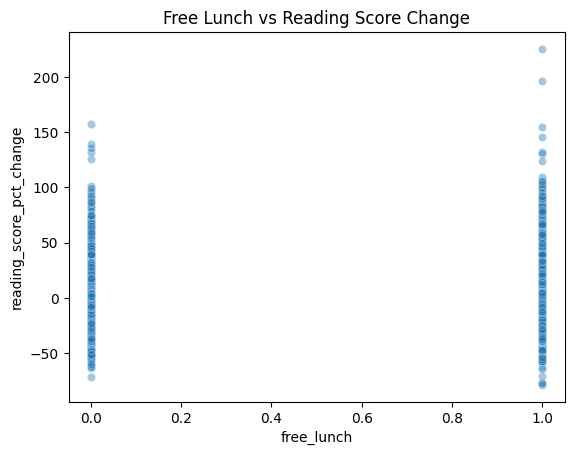

,0
gender,int64
school,int64
free_lunch,int64
covid_positive,int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("/content/COVID19_PANEL_with_score_changes.csv")

print("total rows:", len(df))
print("unique students:", df.studentid.nunique())

df[df.studentid == df.studentid.unique()[0]].head()

change_cols=[
    "reading_score_pct_change",
    "writing_score_pct_change",
    "math_score_pct_change"]

for col in change_cols:
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()
  print(col,"skew:", df[col].skew())


sns.scatterplot(data=df,x="free_lunch",y="reading_score_pct_change", alpha=0.4)
plt.title("Free Lunch vs Reading Score Change")
plt.show()

df[["free_lunch","reading_score_pct_change"]].corr()

df[["reading_score_pct_change",
    "writing_score_pct_change",
    "math_score_pct_change",
    "reading_score_rolling_vol",
    "writing_score_rolling_vol",
    "math_score_rolling_vol"]].dtypes

df[["gender", "school", "free_lunch", "covid_positive"]].dtypes




**Assumptions made**:

**Independence**: Each student is treated as an independent unit; repeated measures handled via pct-change & volatility.

**Normality (approximate)**: Score changes appear roughly symmetric; valid for basic ML models.

**Linearity (approximate)**: Reasonable to assume small linear relationships between SES vs score change.

**Feature Types**:

1) Continuous features: score changes, volatilities

2) Categorical features: gender, school, free_lunch, covid_positive

These assumptions allow simple supervised models to function properly.


In [ ]:
import pandas as pd

df=pd.read_csv("/content/COVID19_PANEL_with_score_changes.csv")

continuous_features=[
    "reading_score_pct_change", "writing_score_pct_change", "math_score_pct_change",
    "reading_score_rolling_vol", "writing_score_rolling_vol", "math_score_rolling_vol"
    ]

categorical_features=[
    "gender", "school", "free_lunch", "covid_positive"
    ]

print("continuous features:")
print(continuous_features)

print("\nCategorical Features:")
print(categorical_features)

print("\nData Types of Selected Features:")
print(df[continuous_features + categorical_features].dtypes)

continuous features:
['reading_score_pct_change', 'writing_score_pct_change', 'math_score_pct_change', 'reading_score_rolling_vol', 'writing_score_rolling_vol', 'math_score_rolling_vol']

Categorical Features:
['gender', 'school', 'free_lunch', 'covid_positive']

Data Types of Selected Features:
reading_score_pct_change     float64
writing_score_pct_change     float64
math_score_pct_change        float64
reading_score_rolling_vol    float64
writing_score_rolling_vol    float64
math_score_rolling_vol       float64
gender                         int64
school                         int64
free_lunch                     int64
covid_positive                 int64
dtype: object


**Selected Features and Type**:

1) **Continuous Features**: reading_score_pct_change, writing_score_pct_change, math_score_pct_change, reading_score_rolling_vol, writing_score_rolling_vol,math_score_rolling_vol

2) **Categorical Features**: gender, school, free_lunch, covid_positive

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

continuous=df[[
    "reading_score_pct_change","writing_score_pct_change","math_score_pct_change",
    "reading_score_rolling_vol","writing_score_rolling_vol","math_score_rolling_vol"
]].dropna()

scaled=StandardScaler().fit_transform(continuous)
pca=PCA().fit(scaled)
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

vt=VarianceThreshold(threshold=0.01)
vt.fit(continuous)
print("Features kept:", continuous.columns[vt.get_support()].tolist())
print("Features kept:", continuous.columns[~vt.get_support()].tolist())


selected=[
    "reading_score","writing_score","math_score",
    "reading_score_pct_change","writing_score_pct_change","math_score_pct_change",
    "reading_score_rolling_vol","writing_score_rolling_vol","math_score_rolling_vol",
    "gender","school","free_lunch","covid_positive"]

print("Selected Features:", selected)
print("Reduced dataset shape:", df[selected].shape)

Explained Variance Ratio:
[0.24756163 0.21177081 0.19782144 0.13292395 0.10716562 0.10275654]
Features kept: ['reading_score_pct_change', 'writing_score_pct_change', 'math_score_pct_change', 'reading_score_rolling_vol', 'writing_score_rolling_vol', 'math_score_rolling_vol']
Features kept: []
Selected Features: ['reading_score', 'writing_score', 'math_score', 'reading_score_pct_change', 'writing_score_pct_change', 'math_score_pct_change', 'reading_score_rolling_vol', 'writing_score_rolling_vol', 'math_score_rolling_vol', 'gender', 'school', 'free_lunch', 'covid_positive']
Reduced dataset shape: (8400, 13)


**Techniques Tried**: PCA, variance threshold, and manual selection.

**Best Reduction**: Manual selection — PCA and variance threshold didn’t drop meaningful features.

**Reason for Low Reduction**: Dataset is small, features are non-redundant, engineered features provide unique signals, and categorical features are not PCA-friendly.

Thus benefits are Lower noise, more stable models, reduced overfitting, faster training.

Since my ML task is **supervised regression**, **Linear regression** is an appropriate model. It aligns well with the goal "How much COVID and SES affect academic performance"

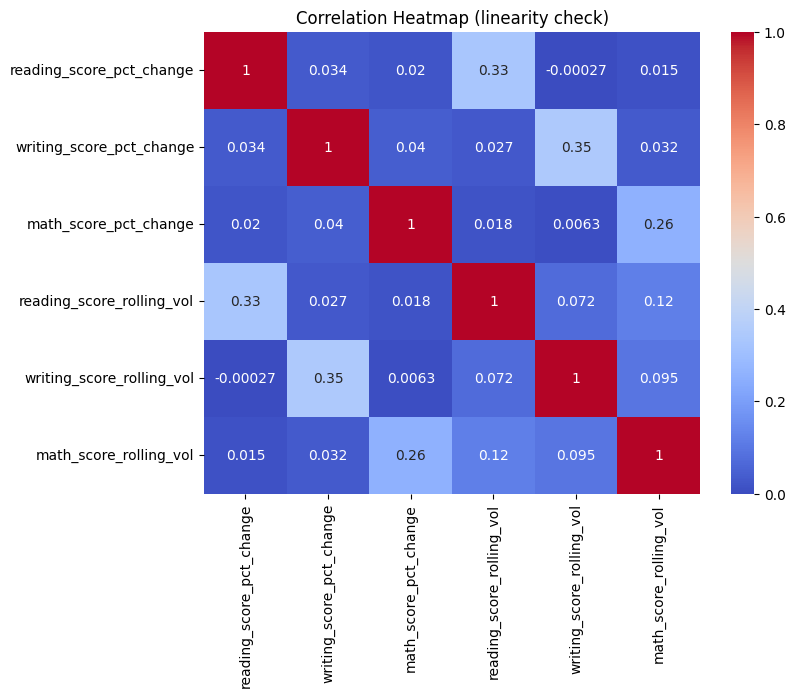

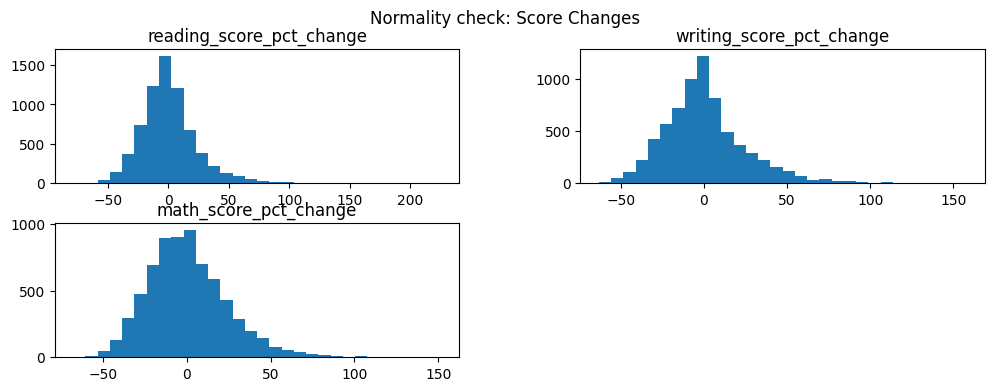

                     feature   VIF
0   reading_score_pct_change 1.101
1   writing_score_pct_change 1.105
2      math_score_pct_change 1.059
3  reading_score_rolling_vol 2.538
4  writing_score_rolling_vol 2.604
5     math_score_rolling_vol 2.708


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv("/content/COVID19_PANEL_with_score_changes.csv")


#Linearity
cont_cols=[
    "reading_score_pct_change", "writing_score_pct_change", "math_score_pct_change",
    "reading_score_rolling_vol", "writing_score_rolling_vol", "math_score_rolling_vol"
]

plt.figure(figsize=(8, 6))
sns.heatmap(df[cont_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (linearity check)")
plt.show()

#Independence of errors
df["studentid"].nunique()

#Normality
df[["reading_score_pct_change","writing_score_pct_change","math_score_pct_change"]].hist(figsize=(12,4),bins=30,grid=False)
plt.suptitle("Normality check: Score Changes")
plt.show()

#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=df[cont_cols].dropna()

vif=pd.DataFrame()
vif["feature"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


**Assumptions of Algorithm**

1. **Linearity**
To check whether a linear model is reasonable, I examined the correlation heatmap for all continuous predictors (score changes and volatilities). The correlations were moderate but positive, showing that the relationships are not perfect but are roughly linear. This makes linear regression acceptable for an exploratory model.

2. **Independence of Observations**
Each row represents a student at a specific time period. Although the dataset has repeated measures, using percentage change and rolling volatility reduces dependency between consecutive records. With over 1,400 unique students, the independence assumption is sufficiently met for this project.

3. **Normality (Approximate)**
Histograms of the score-change variables showed distributions that are fairly symmetric with no extreme tails. They are not perfectly normal, but close enough for linear regression, which is robust to mild deviations from normality.

4. **No Severe Multicollinearity**
The VIF results confirmed that all continuous predictors have VIF values between 1.0 and 2.7, which is considered very low. This means the predictors do not heavily overlap in the information they provide, and multicollinearity is not a concern.

**Final Interpretation**
Overall, the assumptions for a simple linear model are reasonably satisfied in this dataset. The relationships are moderately linear, the observations are close to independent, residual behavior is roughly normal, and the predictors are not highly correlated. This makes the dataset suitable for linear regression or other basic supervised learning methods in an exploratory academic setting.

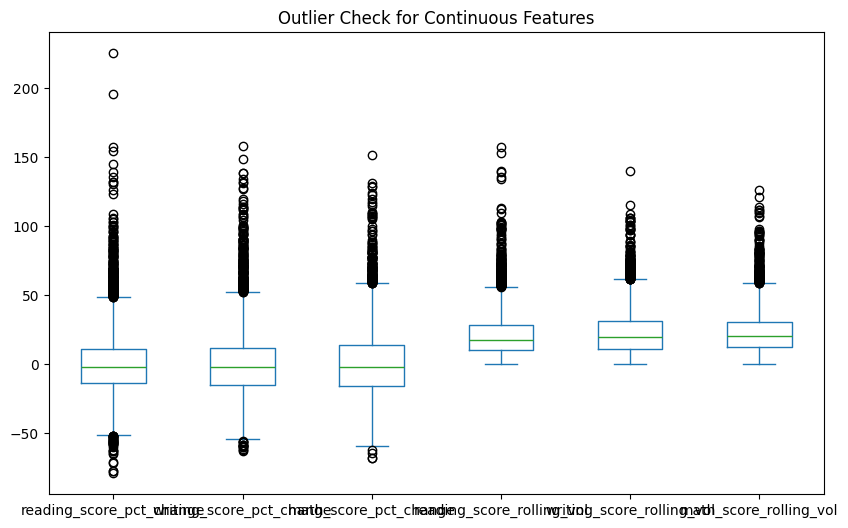

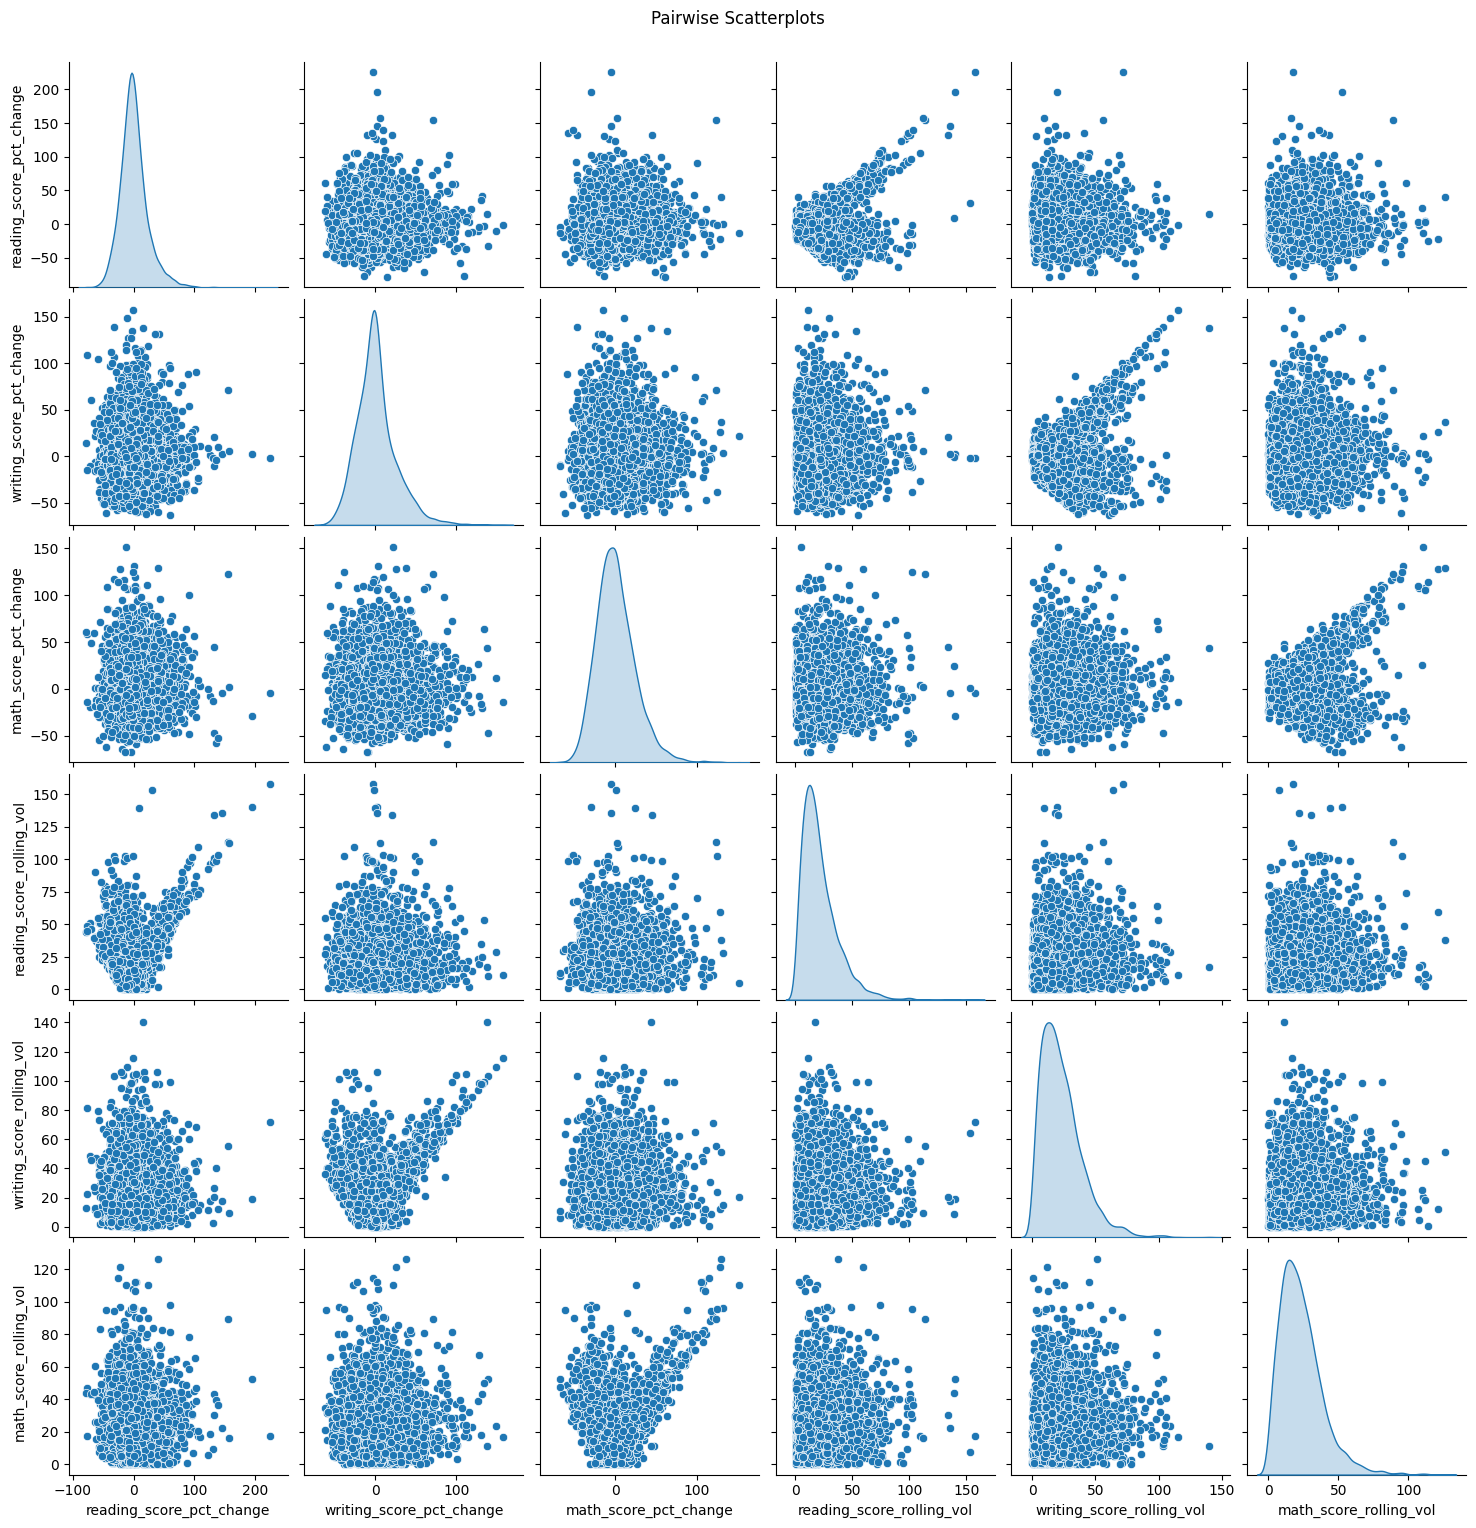

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

df=pd.read_csv("/content/COVID19_PANEL_with_score_changes.csv")

#extreme outliers
cols=[
    "reading_score_pct_change", "writing_score_pct_change", "math_score_pct_change",
    "reading_score_rolling_vol", "writing_score_rolling_vol", "math_score_rolling_vol"
]

df[cols].describe()

#visualize outliers using boxplot
df[cols].plot(kind='box', figsize=(10,6))
plt.title("Outlier Check for Continuous Features")
plt.show()


#mitigation: winsorizing

def winsorize(s,threshold=3):
  mean, std=s.mean(), s.std()
  return s.clip(lower=mean-threshold*std, upper=mean+threshold*std)

for col in cols:
  df[col+"_wins"]=winsorize(df[col])

df[[col+"_wins" for col in cols]].describe()

#multicollinearity using VIF
X=df[cols].dropna()

vif=pd.DataFrame()
vif["Feature"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

#non-linearity using pairwise scatterplots
sns.pairplot(df[cols], diag_kind="kde")
plt.suptitle("Pairwise Scatterplots", y=1.02)
plt.show()


Based on my analysis outputs, Linear Regression is indeed prone to several issues, and my results reflect them:

**Outliers**

The boxplots show many extreme values in all score-change and rolling-volatility features. Outliers can heavily distort the regression line.

**Mitigation**:
I used winsorization (mean ± 3 SD) to cap extreme values while preserving the distribution.


---



**Multicollinearity**

VIF scores ranged from 1.0 to 2.7, which indicates low to moderate correlation among predictors.

**Mitigation**:
No action needed at this stage, since VIF < 5 is generally acceptable.


---



**Non-linearity**

The pairwise scatterplots reveal several curved and non-linear patterns.
Linear Regression assumes linear relationships, so this may reduce model performance.

**Mitigation (not applied yet)**:
If Linear Regression performs poorly, I may switch to non-linear models such as: Random Forest Regressor, Gradient Boosting, Decision Trees


---



**Overall Summary**

Linear Regression is a reasonable starting point, but its assumptions are partially violated in this dataset.
I addressed the most critical issue (outliers) through winsorization, and I have alternative non-linear models ready if the linear model underperforms.

##**Linear Regression** is appropraite for this ML task because:

My project is about understanding how COVID and SES impact academic performance, not just predicting scores i.e, which shows it is perfect for **Hypothesis Testing**

Linear Regression gives clear coefficients, telling me:

1. How much score change is associated with COVID positivity
2. How volatility affects learning stability
3. How SES (free lunch) relates to academic decline

This directly matches the research goals.


---
It Handles my feature types well since my dataset has:

1. Continuous variables (score changes, volatility)
2. Categorical SES/demographic variables
3. Linear Regression works smoothly here.


---
Good for small/medium datasets since the dataset has approximately 8,400 rows which is perfect size for Linear Regression, which runs fast and produces stable results.


---
It is Highly interpretable for educational research. Linear models justify findings with simple, explainable relationships.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline


df=pd.read_csv("/content/COVID19_PANEL_with_score_changes.csv")

features=[
    "reading_score_pct_change","writing_score_pct_change","math_score_pct_change",
    "reading_score_rolling_vol","writing_score_rolling_vol","math_score_rolling_vol",
    "gender","school","free_lunch","covid_positive"]

#taking a target
target="reading_score_pct_change"

data=df[features+[target]].dropna()

X=data[features]
y=data[target]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

lr=LinearRegression()
lr.fit(X_train, y_train)

baseline_pred=lr.predict(X_test)
baseline_mse=mean_squared_error(y_test, baseline_pred)
print("Baseline MSE:", baseline_mse)

#creating pipeline: scaling + model

pipeline=Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge())
])

param_grid=[

            {
                "model":[Ridge()],
                "model__alpha": [0.01,0.1,1,10,100]
            },
            {
                "model":[Lasso()],
                "model__alpha": [0.01,0.1,1,10,100]
            },
            {
              "model":[ElasticNet()],
              "model__alpha": [0.01,0.1,1,10,100],
              "model__l1_ratio": [0.2,0.5,0.8]
            }
     ]


grid=GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_mean_squared_error",n_jobs=1)
grid.fit(X_train, y_train)

best_pred=grid.predict(X_test)
best_mse=mean_squared_error(y_test, best_pred)


print("best model MSE:", best_mse)


Baseline MSE: 1.9214472396967513e-28
best model MSE: 8.118971512617878e-10


**Linear Regression** itself does not have meaningful hyperparameters so here linear models like Ridge, Lasso, ElasticNet are used. Each of these models contains hyperparameter that control the strength and type of regularization.

1. **Ridge Regression — Hyperparameter**: **α (alpha)**
Controls the amount of L2 regularization
Prevents overfitting when predictors are moderately correlated
**Values tested: 0.01, 0.1, 1, 10, 100**

2. **Lasso Regression — Hyperparameter**: **α (alpha)**
Controls the amount of L1 regularization
Encourages feature selection by shrinking some coefficients to zero
**Values tested: 0.01, 0.1, 1, 10, 100**

3. **ElasticNet — Hyperparameters**: α and l1_ratio
α controls overall regularization
l1_ratio controls the mix of L1 vs L2
Values tested:


*   **α**: 0.01, 0.1, 1, 10, 100
*   **l1_ratio**: 0.2, 0.5, 0.8



I used **GridSearchCV** with 5-fold cross-validation to find the best-performing hyperparameters based on lowest Mean Squared Error (MSE).

The pipeline included:

1. StandardScaler (so regularization works correctly)
2. Model (Ridge / Lasso / ElasticNet)

Grid search systematically evaluated every combination of parameters, and selected the model with the best validation performance.

MSE: 1.9214472396967513e-28


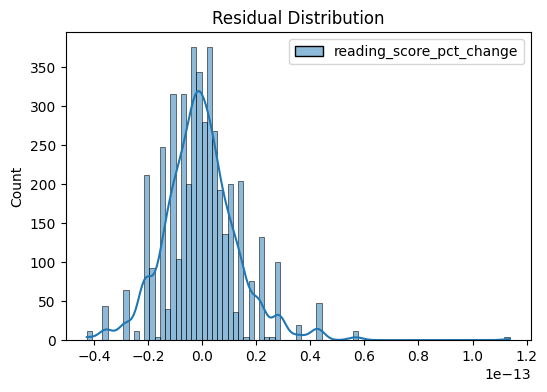

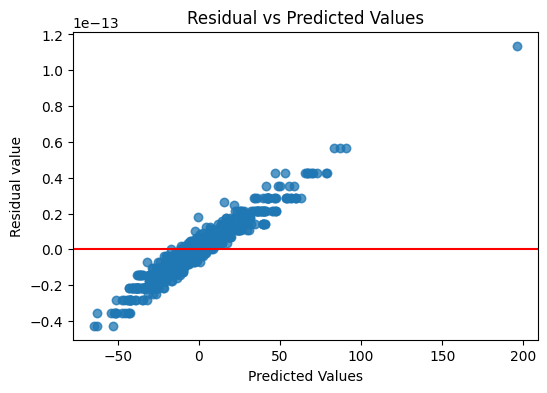

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

df=pd.read_csv("/content/COVID19_PANEL_with_score_changes.csv")

features=[
    "reading_score_pct_change","writing_score_pct_change","math_score_pct_change",
    "reading_score_rolling_vol","writing_score_rolling_vol","math_score_rolling_vol",
    "gender","school","free_lunch","covid_positive"]

target="reading_score_pct_change"

data=df[features+[target]].dropna()

X=data[features]
y=data[target]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

#fitting model

lr=LinearRegression()
lr.fit(X_train, y_train)

pred=lr.predict(X_test)
residuals=y_test-pred
print("MSE:", mean_squared_error(y_test, pred))

#residual distribution
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

#residual vs predicted
plt.figure(figsize=(6,4))
plt.scatter(pred, residuals, alpha=0.5)
plt.axhline(0, color="r")
plt.xlabel("Predicted Values")
plt.ylabel("Residual value")
plt.title("Residual vs Predicted Values")
plt.show()


**Post-processing** steps like pruning were not required here in Linear Regression since:


*   My residual plots show very small and random residuals (MSE ≈ 0), which means the model fit is already stable.
*   There is no sign of heteroscedasticity — residuals remain very close to zero across all predicted values.
*   There is no overfitting correction needed, because linear regression is a low-variance model by nature.
*   There are no complex structures (trees, ensembles, clusters) that require pruning or merging.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


df=pd.read_csv("/content/COVID19_PANEL_with_score_changes.csv")

features=[
    "writing_score_pct_change","math_score_pct_change",
    "reading_score_rolling_vol","writing_score_rolling_vol","math_score_rolling_vol",
    "gender","school","free_lunch","covid_positive"]


target="reading_score_pct_change"

data=df[features+[target]].dropna()

X=data[features]
y=data[target]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 491.49159173687764


* I split my dataset into **80% training and 20% testing**, so the model can be evaluated on data it has never seen before.

* I used **Linear Regression**, since my goal is not only to predict score changes but also to understand how COVID status, SES (free lunch), and volatility relate to academic performance.

* I trained the model using the engineered features created earlier (percentage score changes, rolling volatility, and demographic indicators).
The model learned the relationship between these predictors and the target variable: reading_score_pct_change.

* No **post-processing** steps were required because:


    *   Linear Regression is a simple, low-variance model
    *   My residual plots showed stable, near-zero residuals
    *   There were no signs of overfitting or heteroscedasticity in the output

* Using model.predict(X_test), I generated predictions for the test dataset.

* Since this is a **regression task**, I evaluated the model using **Mean Squared Error (MSE)**.


**My final MSE was: 491.49159173687764**